# Construction of a fuzzy neural network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

## Explore the set - make blobs

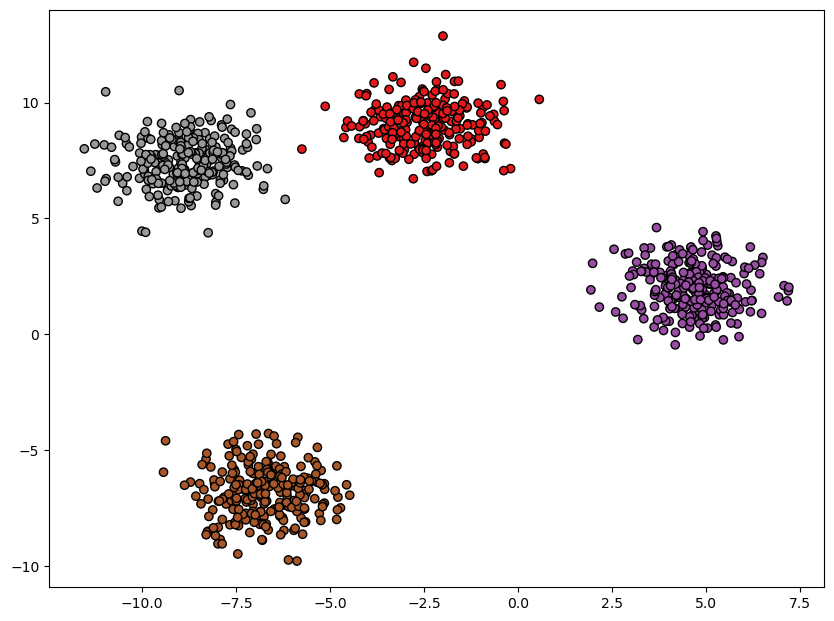

In [2]:
X, labels = make_blobs(n_samples=1000, n_features=2, 
                       centers=4, random_state=42,
                       cluster_std=1.0)
plt.figure(figsize=(10.0, 7.5))
plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, 
            cmap="Set1", edgecolor=(0, 0, 0, 1))
plt.show()

In [3]:
X[:, 0].min(), X[:, 0].max()

(-11.541560049635248, 7.213238639477962)

In [4]:
X[:, 1].min(), X[:, 1].max()

(-9.776364971469636, 12.867017618853044)

In [5]:
X.shape

(1000, 2)

## Create a membership function

### Triangular membership function

In [6]:
def triangular_membership(x, a, b, m):
    if x <= a:
        return 0
    elif x <= m:
        return (x - a) / (m - a)
    elif x <= b:
        return (b - x) / (b - m)
    else:
        return 0

In [7]:
def triangular_preprocess(X, min=None, max=None, a=None, b=None, m=None):
    con = np.array([])
    if min is None:
        min = X.min()
    if max is None:
        max = X.max()
    margin = (np.abs(min) + np.abs(max)) / 4
    if a is None:
        a = min + margin
    if b is None:
        b = max - margin
    if m is None:
        m = (np.abs(min) + np.abs(max)) / 2
    for data in X:
        con = np.append(con, triangular_membership(data, a, b, m))
    return con

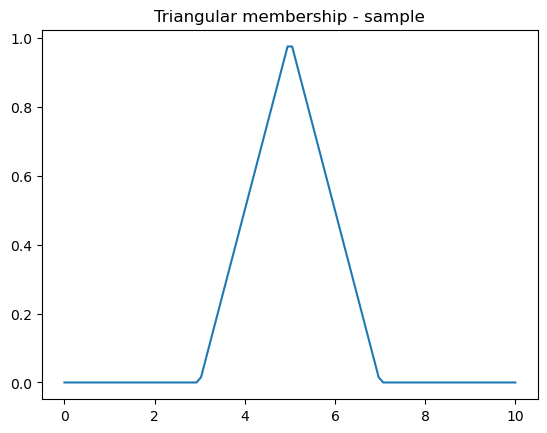

In [8]:
plt.title('Triangular membership - sample')
o = np.linspace(0, 10, 100)
plt.plot(o, triangular_preprocess(o, a=3, b=7, m=5))
plt.show()

### Trapezoidal membership function

In [9]:
def trapezoidal(x, a, b, m, n):
    if x < a:
        return 0
    elif x < m:
        return (x - a) / (m - a)
    elif x < n:
        return 1
    elif x < b:
        return (b - x) / (b - n)
    else:
        return 0

In [10]:
def trapezoidal_preprocess(X, min=None, max=None, a=None, b=None, m=None, n=None):
    con = np.array([])

    if min is None:
        min = X.min()
    if max is None:
        max = X.max()
    margin = (np.abs(min) + np.abs(max)) / 4
    if a is None:
        a = min + margin
    if b is None:
        b = max - margin
    if m is None:
       m = a + margin / 2
    if n is None:
        n = b - margin / 2
    
    for data in X:
        con = np.append(con, trapezoidal(data, a, b, m, n))
    return con

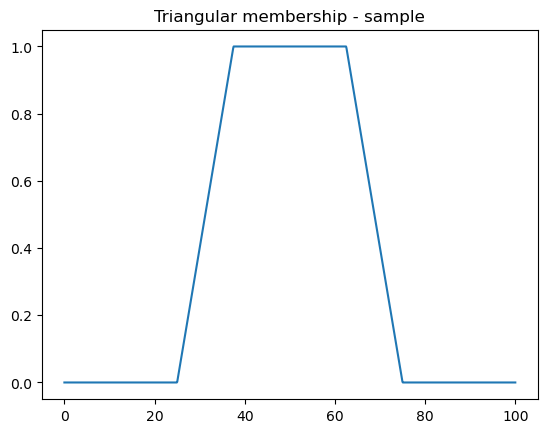

In [11]:
plt.title('Triangular membership - sample')
o = np.linspace(0, 100, 1000)
plt.plot(o, trapezoidal_preprocess(o))
plt.show()

### Gaussian membership function

In [12]:
def gaussian(x, m, k):
    return np.exp(-((x - m)**2) / (k**2))

In [13]:
def gaussian_preprocess(X, k=None, m=None):
    con = np.array([])
    if k is None:
        k = (np.abs(X.min()) + np.abs(X.max())) / 2
    if m is None:
        m = k * 1.3

    for data in X:
        con = np.append(con, gaussian(data, k, m))
    return con

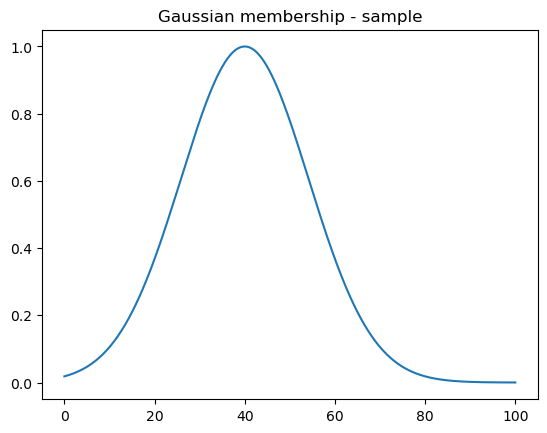

In [14]:
plt.title('Gaussian membership - sample')
o = np.linspace(0, 100, 1000)
plt.plot(o, gaussian_preprocess(o, 40, 20))
plt.show()

In [15]:
model_info_make_blobs = {
    'standard_network': {
        'standard data - own_network [loss/accuracy]:': None,
        'standard data - grid_generated_network [loss/accuracy]:': None,
        'standard data - basic_network [loss/accuracy]:': None,
        'overlapping data - own_network [loss/accuracy]:': None,
        'overlapping data - grid_generated_network [loss/accuracy]:': None,
        'overlapping data - basic_network [loss/accuracy]:': None,
    }, 
    'triangular': {
        'standard data - own_network [loss/accuracy]:': None, 
        'standard data - grid_generated_network [loss/accuracy]:': None,
        'standard data - basic_network [loss/accuracy]:': None,
        'overlapping data - own_network [loss/accuracy]:': None,
        'overlapping data - grid_generated_network [loss/accuracy]:': None,
        'overlapping data - basic_network [loss/accuracy]:': None,
        }, 
    'trapezoidal': {
        'standard data - own_network [loss/accuracy]:': None,
        'standard data - grid_generated_network [loss/accuracy]:': None,
        'standard data - basic_network [loss/accuracy]:': None,
        'overlapping data - own_network [loss/accuracy]:': None,
        'overlapping data - grid_generated_network [loss/accuracy]:': None,
        'overlapping data - basic_network [loss/accuracy]:': None,
        }, 
    'gaussian': {
        'standard data - own_network [loss/accuracy]:': None,
        'standard data - grid_generated_network [loss/accuracy]:': None,
        'standard data - basic_network [loss/accuracy]:': None,
        'overlapping data - own_network [loss/accuracy]:': None,
        'overlapping data - grid_generated_network [loss/accuracy]:': None,
        'overlapping data - basic_network [loss/accuracy]:': None,
        }, 
}

## Standard neural network

In [16]:
X_scaled = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2)

In [17]:
ann_1 = tf.keras.Sequential()
ann_1.add(tf.keras.layers.Input(shape=(X_train.shape[1])))

ann_1.add(tf.keras.layers.Dense(32, activation='relu'))
ann_1.add(tf.keras.layers.Dense(16, activation='relu'))
ann_1.add(tf.keras.layers.Dense(4, activation='softmax'))

ann_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
ann_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
Total params: 692
Trainable params: 692
Non-trainable params: 0
_________________________________________________________________


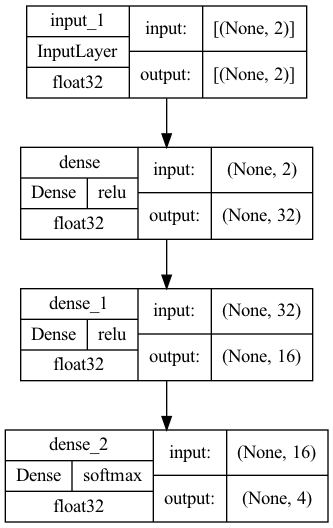

In [19]:
from IPython.display import Image

try:
    tf.keras.utils.plot_model(ann_1, 'ann_1.png', show_dtype=True, show_shapes=True, show_layer_activations=True)
    display(Image('ann_1.png'))
except Exception as e:
    print(f'Error occurred: {e}')


### Model training

In [20]:
history = ann_1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

2024-06-17 17:44:58.139182: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


### Model predictions

In [21]:
loss, acc = ann_1.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['standard_network']['standard data - own_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_1.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.41, Model accuracy: 1.00

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        45

    accuracy                           0.99       200
   macro avg       0.99      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



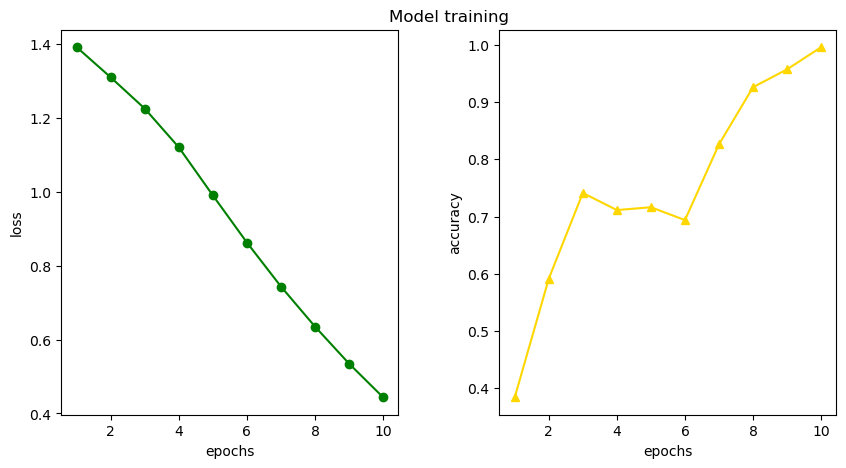

In [22]:
def show_training_data():
    loss = history.history['loss']
    acc = history.history['accuracy']
    model_epochs = np.arange(1, len(loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.title('Model training')

    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(model_epochs, loss, marker='o', color='green')

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(model_epochs, acc, marker='^', color='gold')

    plt.subplots_adjust(wspace=0.3)
    plt.show()

show_training_data()

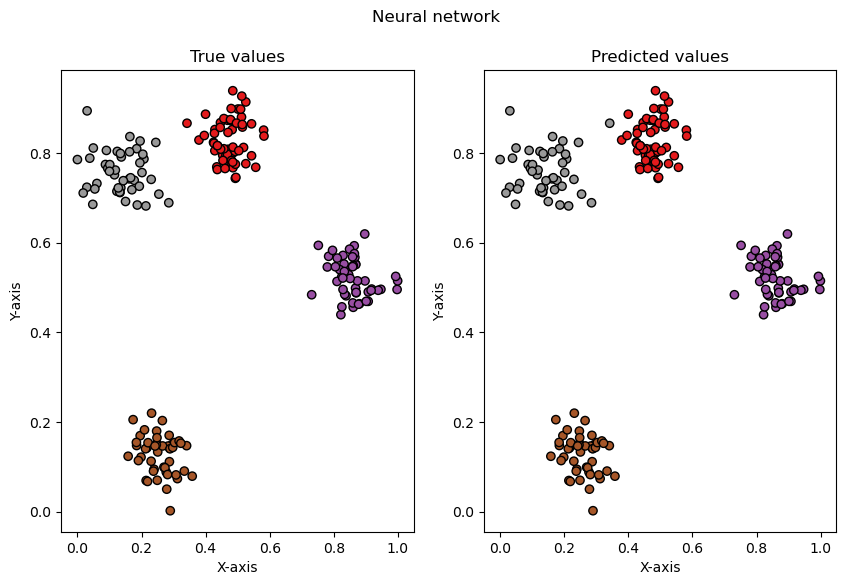

In [23]:
def show_prediction(title):
    plt.figure(figsize=(10, 6))
    plt.suptitle(title)
    plt.subplot(1, 2, 1)
    plt.title('True values')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_test, 
                cmap="Set1", edgecolor=(0, 0, 0, 1))


    plt.subplot(1, 2, 2)
    plt.title('Predicted values')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred, 
                cmap="Set1", edgecolor=(0, 0, 0, 1))
    plt.show()

show_prediction('Neural network')

## Network training based on triangular membership function

In [24]:
concat = np.stack([triangular_preprocess(X[:, 0]), triangular_preprocess(X[:, 1])], axis=1)
concat

array([[0.        , 0.72423299],
       [0.04407376, 0.        ],
       [0.03275118, 0.        ],
       ...,
       [0.64961008, 0.56493827],
       [0.        , 0.        ],
       [0.        , 0.72745139]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

### Model training

In [26]:
history = ann_1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [27]:
loss, acc = ann_1.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['triangular']['standard data - own_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_1.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.10, Model accuracy: 1.00

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       1.00      1.00      1.00        49
           2       0.98      1.00      0.99        48
           3       1.00      1.00      1.00        53

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      1.00       200



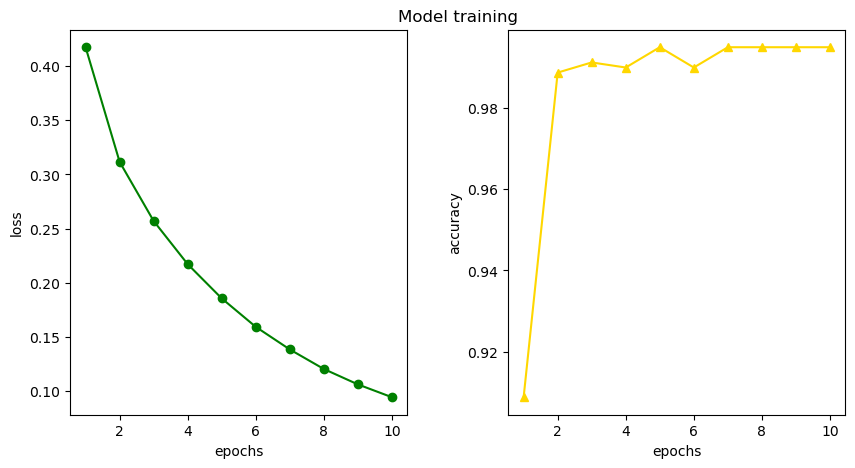

In [28]:
show_training_data()

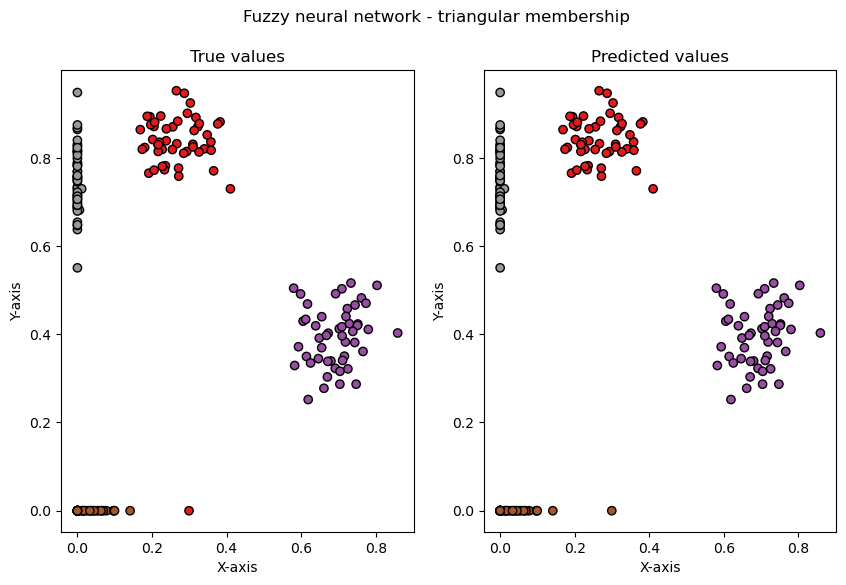

In [29]:
show_prediction('Fuzzy neural network - triangular membership')

## Network training based on trapezoidal membership function

In [30]:
concat = np.stack([trapezoidal_preprocess(X[:, 0]), trapezoidal_preprocess(X[:, 1])], axis=1)
concat

array([[0.        , 0.05001162],
       [0.30512876, 0.        ],
       [0.22674095, 0.        ],
       ...,
       [0.        , 0.9188098 ],
       [0.        , 0.        ],
       [0.        , 0.03245838]])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

### Model training

In [32]:
history = ann_1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [33]:
loss, acc = ann_1.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['trapezoidal']['standard data - own_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_1.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.32, Model accuracy: 0.87

Classification report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       0.95      1.00      0.97        55
           2       0.95      0.45      0.61        42
           3       0.72      0.93      0.81        55

    accuracy                           0.86       200
   macro avg       0.89      0.84      0.84       200
weighted avg       0.88      0.86      0.85       200



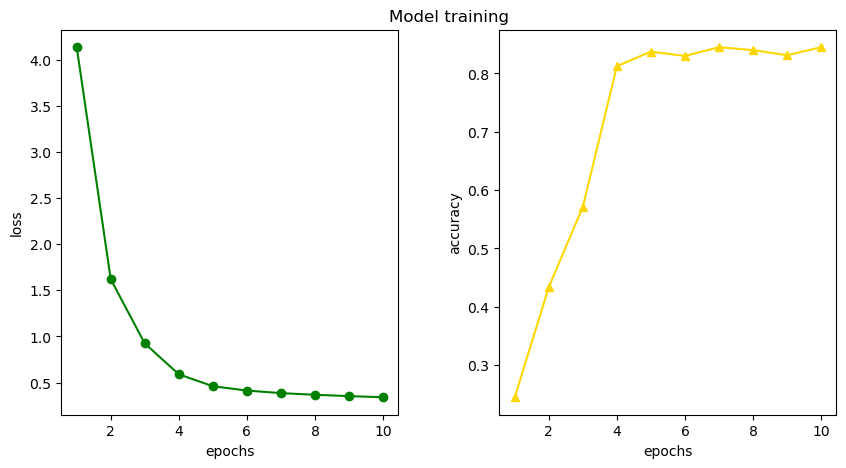

In [34]:
show_training_data()

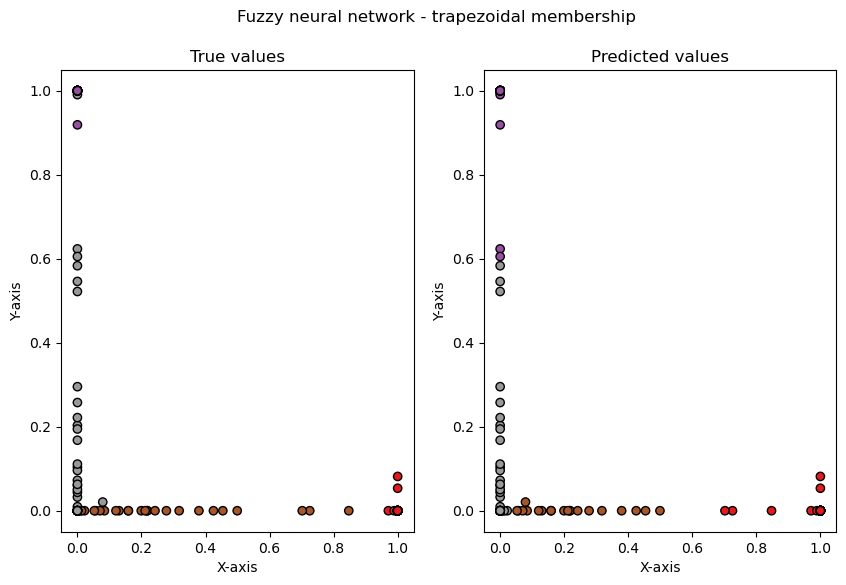

In [35]:
show_prediction('Fuzzy neural network - trapezoidal membership')

## Network training based on Gaussian membership function

In [36]:
concat = np.stack([gaussian_preprocess(X[:, 0]), gaussian_preprocess(X[:, 1])], axis=1)
concat

array([[0.11488194, 0.91974479],
       [0.19794804, 0.22774884],
       [0.19045323, 0.21944621],
       ...,
       [0.80442953, 0.81202539],
       [0.14745124, 0.20993114],
       [0.09322894, 0.92153205]])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

### Model training

In [38]:
history = ann_1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model prediction

In [39]:
loss, acc = ann_1.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['gaussian']['standard data - own_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_1.predict(X_test, verbose=0), axis=1)
print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.07, Model accuracy: 1.00

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        44

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



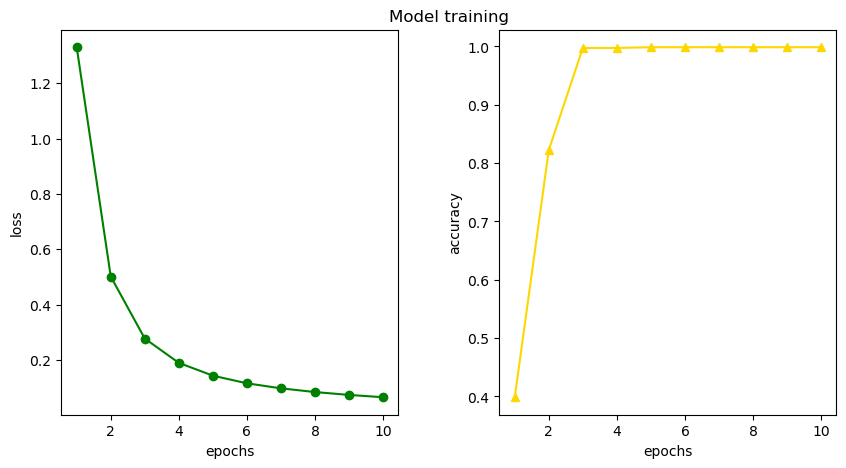

In [40]:
show_training_data()

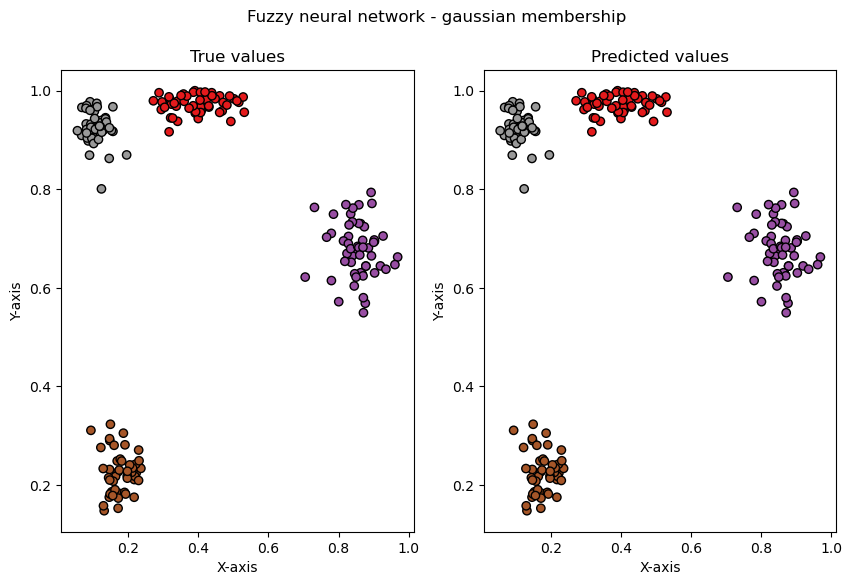

In [41]:
show_prediction('Fuzzy neural network - gaussian membership')

## Visualization of network results

In [42]:
pd.DataFrame(model_info_make_blobs).dropna()

standard_network  \
standard data - own_network [loss/accuracy]:  [0.4097595512866974, 0.9950000047683716]   

                                                                             triangular  \
standard data - own_network [loss/accuracy]:  [0.10167400538921356, 0.9950000047683716]   

                                                                           trapezoidal  \
standard data - own_network [loss/accuracy]:  [0.3232649266719818, 0.8650000095367432]   

                                                                gaussian  
standard data - own_network [loss/accuracy]:  [0.06550771743059158, 1.0]

## Created a neural network using GridSearchCV

In [43]:
def create_model(n_layers, activation_func, optimizer, loss_func):
    model = tf.keras.Sequential()
    for neurons in n_layers:
        model.add(tf.keras.layers.Dense(neurons, activation=activation_func))
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy'])
    return model

n_layers = [[32, 16], [64, 32, 16], [128, 64, 32], [128, 64, 32, 16]]
activation_funcs = ['relu']
loss_funcs = ['sparse_categorical_crossentropy']
optimizers = ['adam', 'sgd']
batch_sizes = [32, 64]
epochs = [10, 20, 30, 40]

model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)

param_grid = dict(n_layers=n_layers, activation_func=activation_funcs,
                  optimizer=optimizers, loss_func=loss_funcs, batch_size=batch_sizes, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)


/var/folders/2z/jzph_r3563xcyq9w7yqt55400000gn/T/ipykernel_43543/1036439753.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)


1.0
{'activation_func': 'relu', 'batch_size': 64, 'epochs': 40, 'loss_func': 'sparse_categorical_crossentropy', 'n_layers': [128, 64, 32, 16], 'optimizer': 'adam'}


In [44]:
X_scaled = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2)

In [45]:
ann_2 = tf.keras.Sequential()
ann_2.add(tf.keras.layers.Input(shape=(X_train.shape[1])))

for units in grid.best_params_['n_layers']:
    ann_2.add(tf.keras.layers.Dense(units, activation='relu'))
ann_2.add(tf.keras.layers.Dense(4, activation='softmax'))

ann_2.compile(optimizer=grid.best_params_['optimizer'], loss='sparse_categorical_crossentropy', metrics=['accuracy'])

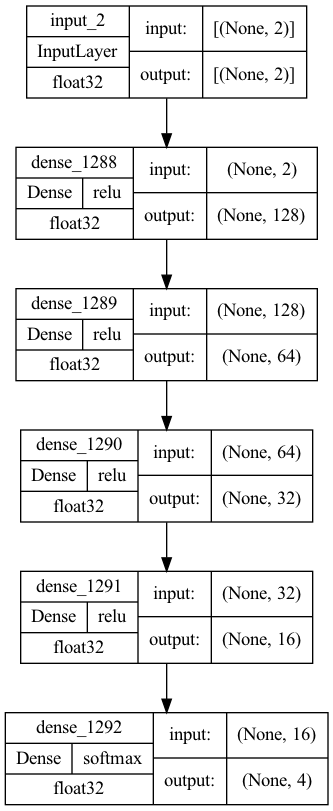

In [46]:
try:
    tf.keras.utils.plot_model(ann_2, 'ann_2.png', show_dtype=True, show_shapes=True, show_layer_activations=True)
    display(Image('ann_2.png'))
except Exception as e:
    print(f'Error occurred: {e}')

In [47]:
ann_2.summary()

Model: "sequential_322"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1288 (Dense)          (None, 128)               384       
                                                                 
 dense_1289 (Dense)          (None, 64)                8256      
                                                                 
 dense_1290 (Dense)          (None, 32)                2080      
                                                                 
 dense_1291 (Dense)          (None, 16)                528       
                                                                 
 dense_1292 (Dense)          (None, 4)                 68        
                                                                 
Total params: 11,316
Trainable params: 11,316
Non-trainable params: 0
_________________________________________________________________


### Model training

In [48]:
history = ann_2.fit(X_train, y_train, epochs=grid.best_params_['epochs'], 
                    batch_size=grid.best_params_['batch_size'], 
                    verbose=0
                )

In [49]:
grid.best_params_

{'activation_func': 'relu',
 'batch_size': 64,
 'epochs': 40,
 'loss_func': 'sparse_categorical_crossentropy',
 'n_layers': [128, 64, 32, 16],
 'optimizer': 'adam'}

### Model predictions

In [50]:
loss, acc = ann_2.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['standard_network']['standard data - grid_generated_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_2.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.00, Model accuracy: 1.00

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        55

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



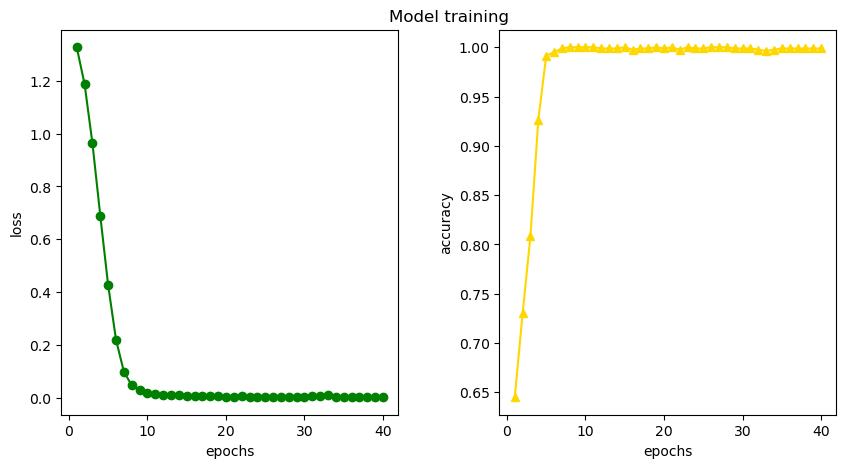

In [51]:
show_training_data()

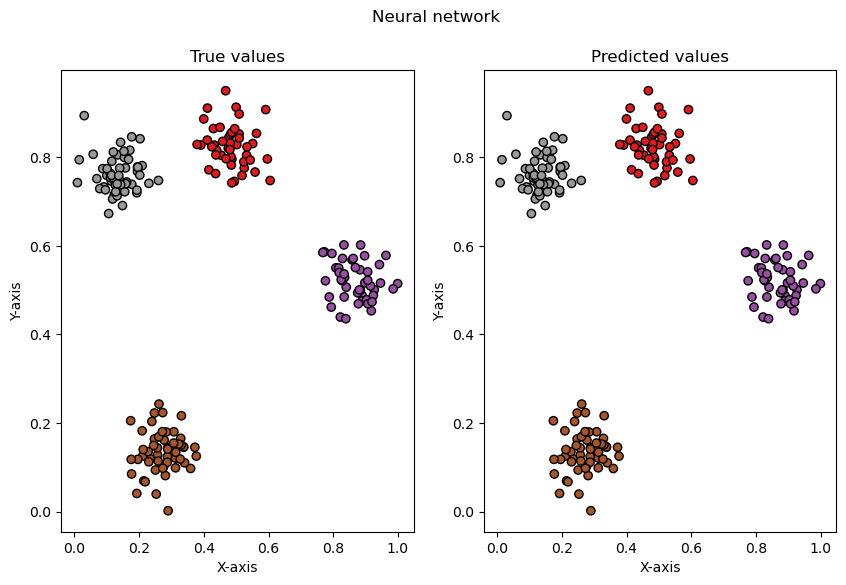

In [52]:
show_prediction('Neural network')

## Training a network created using Grid Search CV based on a triangular membership function

In [53]:
concat = np.stack([triangular_preprocess(X[:, 0]), triangular_preprocess(X[:, 1])], axis=1)
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

### Model training

In [54]:
history = ann_2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [55]:
loss, acc = ann_2.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['triangular']['standard data - grid_generated_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_2.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.01, Model accuracy: 1.00

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      1.00      1.00        50
           2       0.98      1.00      0.99        49
           3       1.00      1.00      1.00        58

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



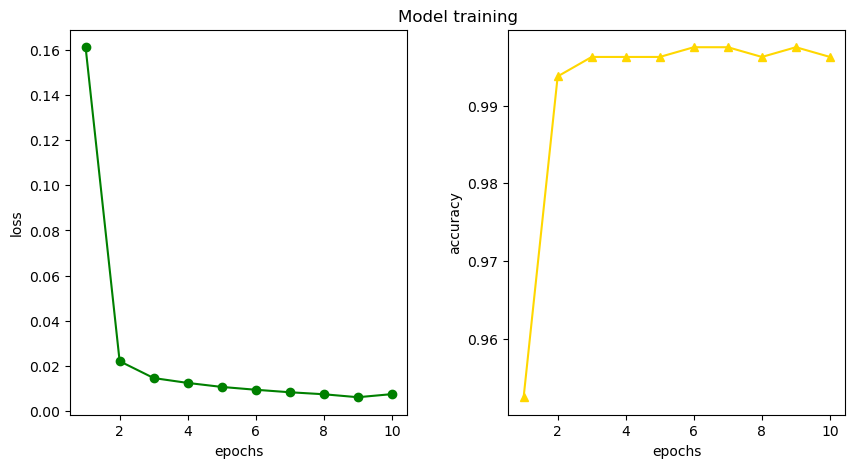

In [56]:
show_training_data()

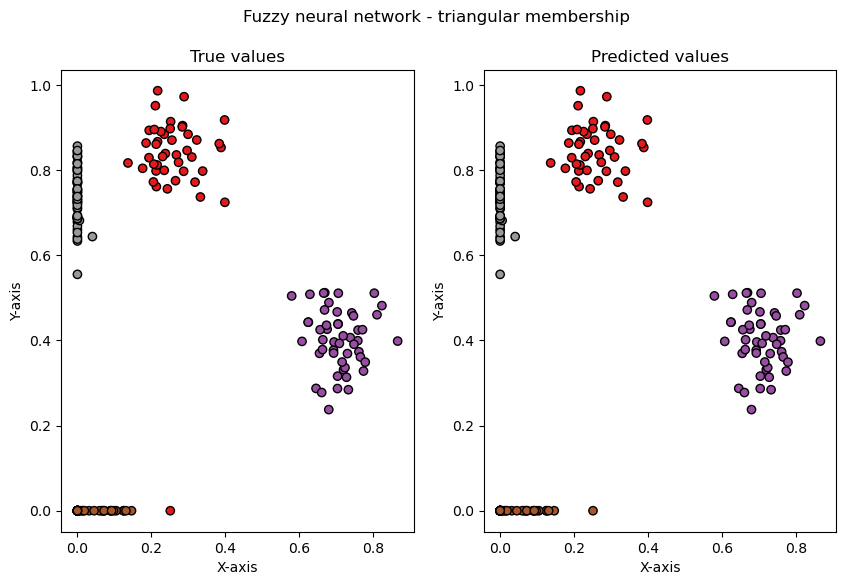

In [57]:
show_prediction('Fuzzy neural network - triangular membership')

## Training a network created using Grid Search CV based on a trapezoidal membership function

In [58]:
concat = np.stack([trapezoidal_preprocess(X[:, 0]), trapezoidal_preprocess(X[:, 1])], axis=1)
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

In [59]:
history = ann_2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

In [60]:
loss, acc = ann_2.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['trapezoidal']['standard data - grid_generated_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_2.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.27, Model accuracy: 0.88

Classification report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        50
           1       0.98      1.00      0.99        52
           2       0.96      0.52      0.68        48
           3       0.72      0.96      0.82        50

    accuracy                           0.88       200
   macro avg       0.90      0.87      0.86       200
weighted avg       0.90      0.88      0.87       200



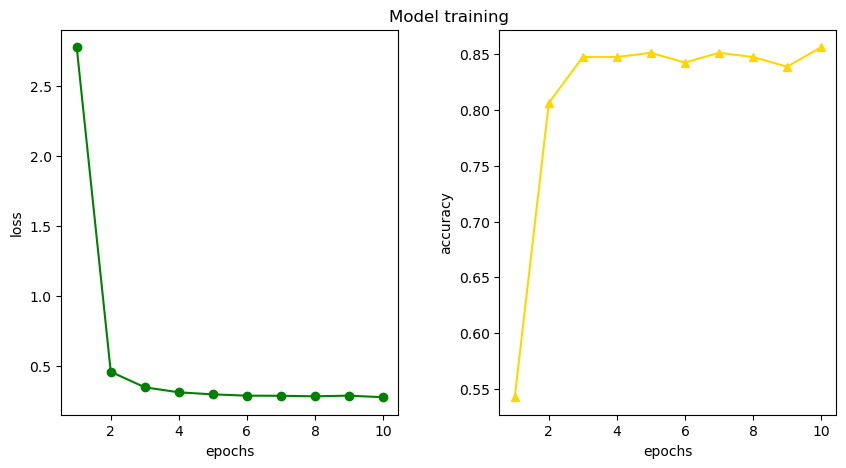

In [61]:
show_training_data()

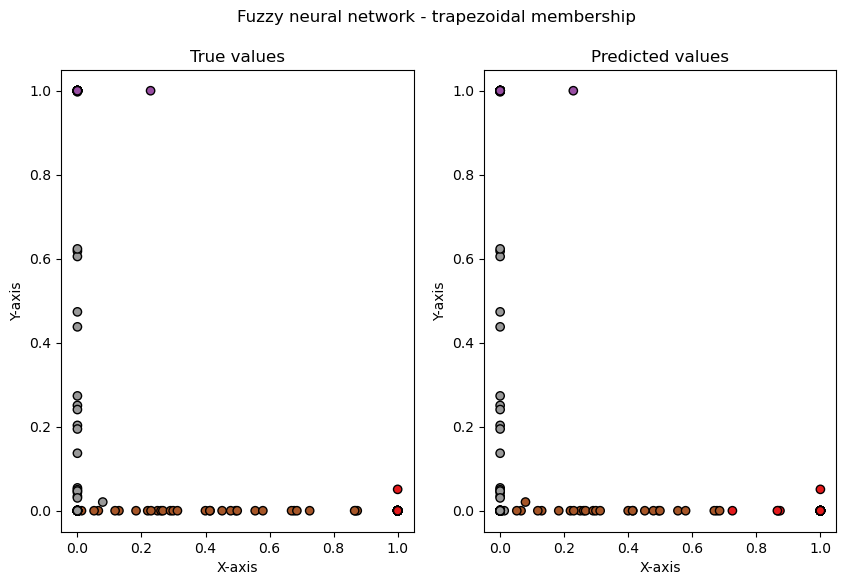

In [62]:
show_prediction('Fuzzy neural network - trapezoidal membership')

## Training a network created using Grid Search CV based on a Gaussian membership function

In [63]:
concat = np.stack([gaussian_preprocess(X[:, 0]), gaussian_preprocess(X[:, 1])], axis=1)
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

In [64]:
history = ann_2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

In [65]:
loss, acc = ann_2.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['gaussian']['standard data - grid_generated_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_2.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.01, Model accuracy: 1.00

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



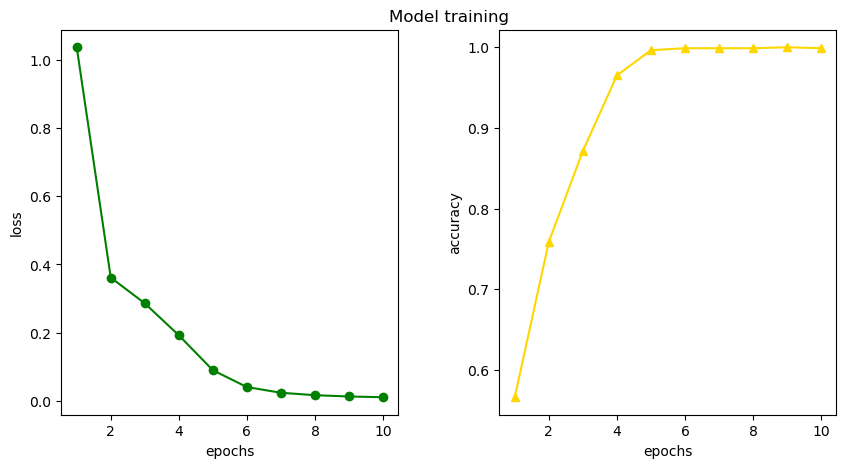

In [66]:
show_training_data()

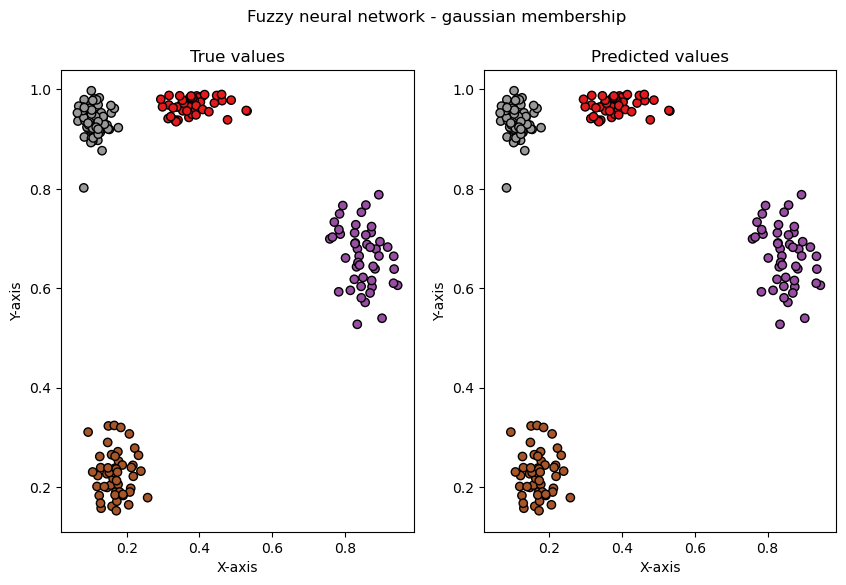

In [67]:
show_prediction('Fuzzy neural network - gaussian membership')

## Visualization of network results based on fuzzy sets - standard data

In [68]:
pd.DataFrame(model_info_make_blobs).dropna()

standard_network  \
standard data - own_network [loss/accuracy]:        [0.4097595512866974, 0.9950000047683716]   
standard data - grid_generated_network [loss/ac...              [0.0011522428831085563, 1.0]   

                                                                                    triangular  \
standard data - own_network [loss/accuracy]:         [0.10167400538921356, 0.9950000047683716]   
standard data - grid_generated_network [loss/ac...  [0.012143590487539768, 0.9950000047683716]   

                                                                                 trapezoidal  \
standard data - own_network [loss/accuracy]:        [0.3232649266719818, 0.8650000095367432]   
standard data - grid_generated_network [loss/ac...              [0.27154600620269775, 0.875]   

                                                                       gaussian  
standard data - own_network [loss/accuracy]:         [0.06550771743059158, 1.0]  
standard data - grid_generated_network [loss/ac...  [0.007531153038144112, 1.0]

## Basic neural network - one hidden layer

In [69]:
X_scaled = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2)

In [70]:
ann_3 = tf.keras.Sequential()
ann_3.add(tf.keras.layers.Input(shape=(X_train.shape[1])))

ann_3.add(tf.keras.layers.Dense(16, activation='relu'))
ann_3.add(tf.keras.layers.Dense(4, activation='softmax'))

ann_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [71]:
ann_3.summary()

Model: "sequential_323"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1293 (Dense)          (None, 16)                48        
                                                                 
 dense_1294 (Dense)          (None, 4)                 68        
                                                                 
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________


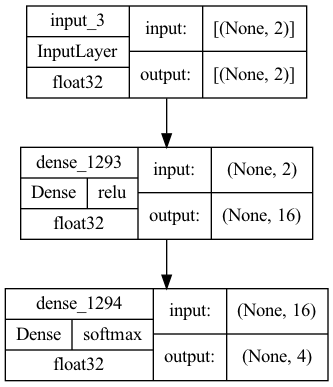

In [72]:
try:
    tf.keras.utils.plot_model(ann_3, 'ann_3.png', show_dtype=True, show_shapes=True, show_layer_activations=True)
    display(Image('ann_3.png'))
except Exception as e:
    print(f'Error occurred: {e}')


### Model training

In [73]:
history = ann_3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [74]:
loss, acc = ann_3.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['standard_network']['standard data - basic_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_3.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 1.16, Model accuracy: 0.78

Classification report: 
              precision    recall  f1-score   support

           0       0.51      1.00      0.67        45
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        57
           3       0.00      0.00      0.00        44

    accuracy                           0.78       200
   macro avg       0.63      0.75      0.67       200
weighted avg       0.67      0.78      0.71       200



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


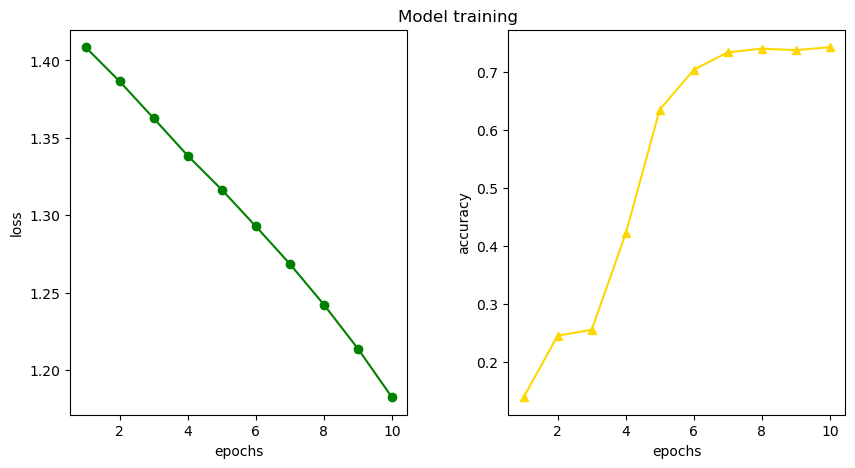

In [75]:
show_training_data()

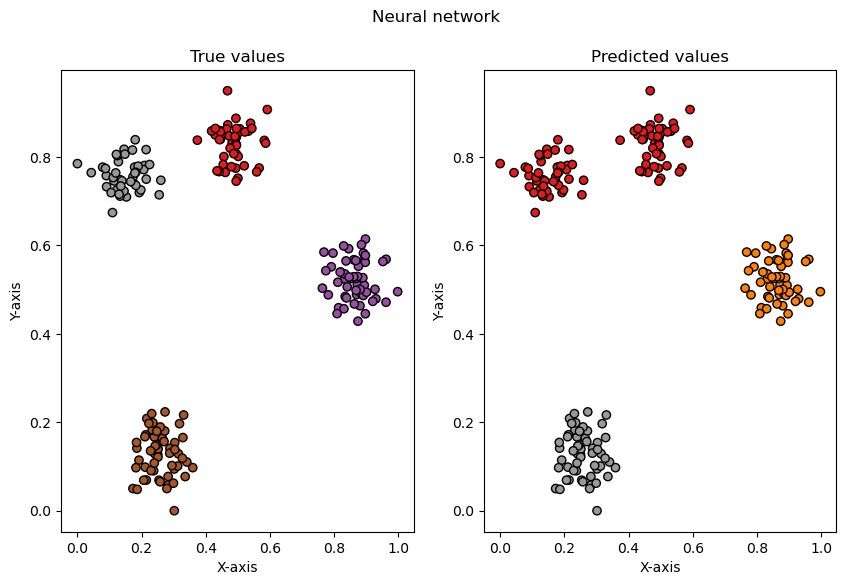

In [76]:
show_prediction('Neural network')

## Network training based on triangular membership function

In [77]:
concat = np.stack([triangular_preprocess(X[:, 0]), triangular_preprocess(X[:, 1])], axis=1)
concat

array([[0.        , 0.72423299],
       [0.04407376, 0.        ],
       [0.03275118, 0.        ],
       ...,
       [0.64961008, 0.56493827],
       [0.        , 0.        ],
       [0.        , 0.72745139]])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

### Model training

In [79]:
history = ann_3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [80]:
loss, acc = ann_3.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['triangular']['standard data - basic_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_3.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.70, Model accuracy: 0.75

Classification report: 
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        48
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        56
           3       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.62      0.75      0.67       200
weighted avg       0.63      0.76      0.67       200



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


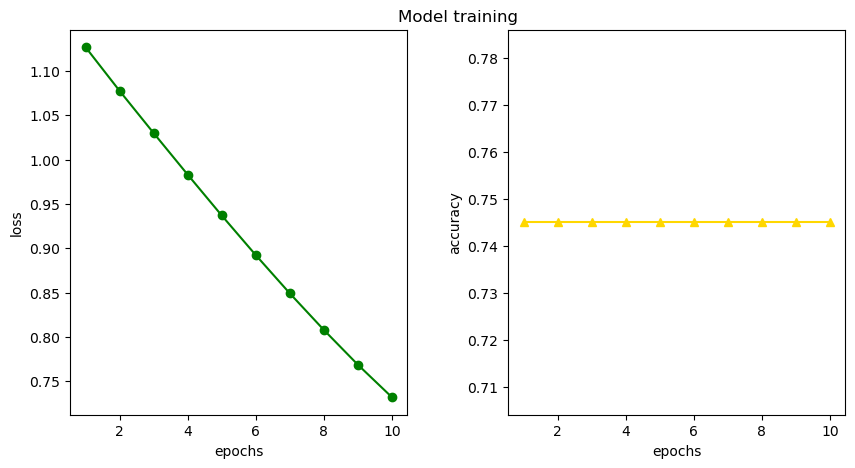

In [81]:
show_training_data()

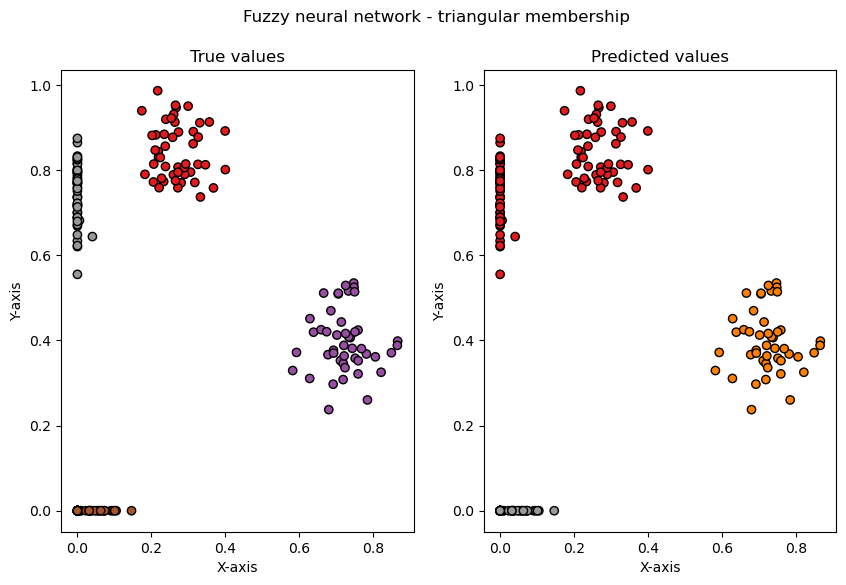

In [82]:
show_prediction('Fuzzy neural network - triangular membership')

## Network training based on trapezoidal membership function

In [83]:
concat = np.stack([trapezoidal_preprocess(X[:, 0]), trapezoidal_preprocess(X[:, 1])], axis=1)
concat

array([[0.        , 0.05001162],
       [0.30512876, 0.        ],
       [0.22674095, 0.        ],
       ...,
       [0.        , 0.9188098 ],
       [0.        , 0.        ],
       [0.        , 0.03245838]])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

### Model training

In [85]:
history = ann_3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [86]:
loss, acc = ann_3.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['trapezoidal']['standard data - basic_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_3.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.90, Model accuracy: 0.74

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        45
           1       0.88      1.00      0.94        51
           2       0.55      0.87      0.67        53
           3       1.00      0.14      0.24        51

    accuracy                           0.74       200
   macro avg       0.82      0.75      0.69       200
weighted avg       0.82      0.74      0.68       200



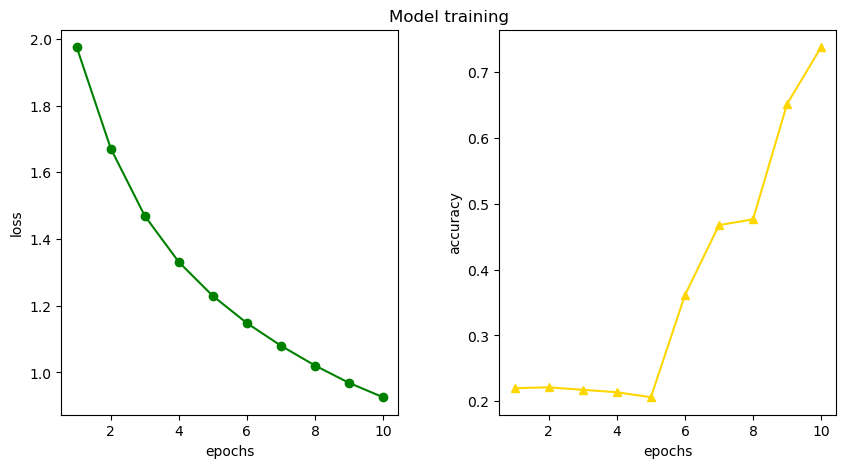

In [87]:
show_training_data()

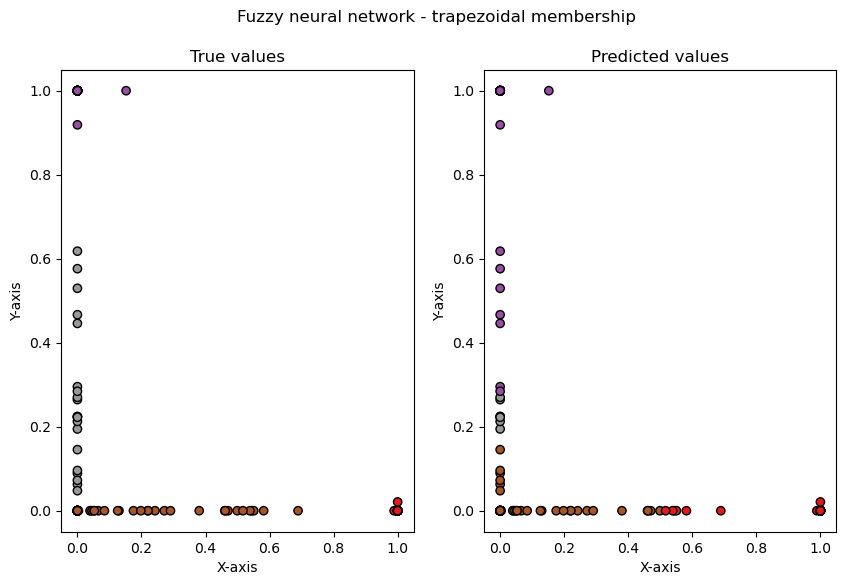

In [88]:
show_prediction('Fuzzy neural network - trapezoidal membership')

## Network training based on Gaussian membership function

In [89]:
concat = np.stack([gaussian_preprocess(X[:, 0]), gaussian_preprocess(X[:, 1])], axis=1)
concat

array([[0.11488194, 0.91974479],
       [0.19794804, 0.22774884],
       [0.19045323, 0.21944621],
       ...,
       [0.80442953, 0.81202539],
       [0.14745124, 0.20993114],
       [0.09322894, 0.92153205]])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

### Model training

In [91]:
history = ann_3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

In [92]:
loss, acc = ann_3.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['gaussian']['standard data - basic_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_3.predict(X_test, verbose=0), axis=1)
print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.72, Model accuracy: 1.00

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        42
           3       0.98      1.00      0.99        49

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



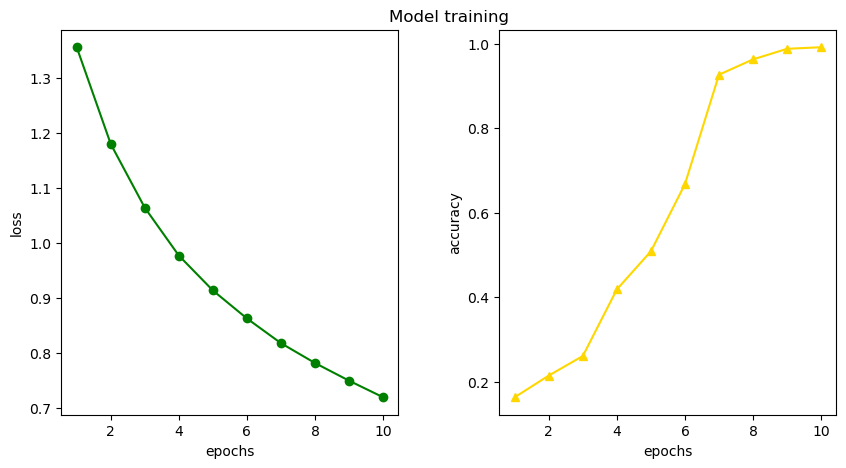

In [93]:
show_training_data()

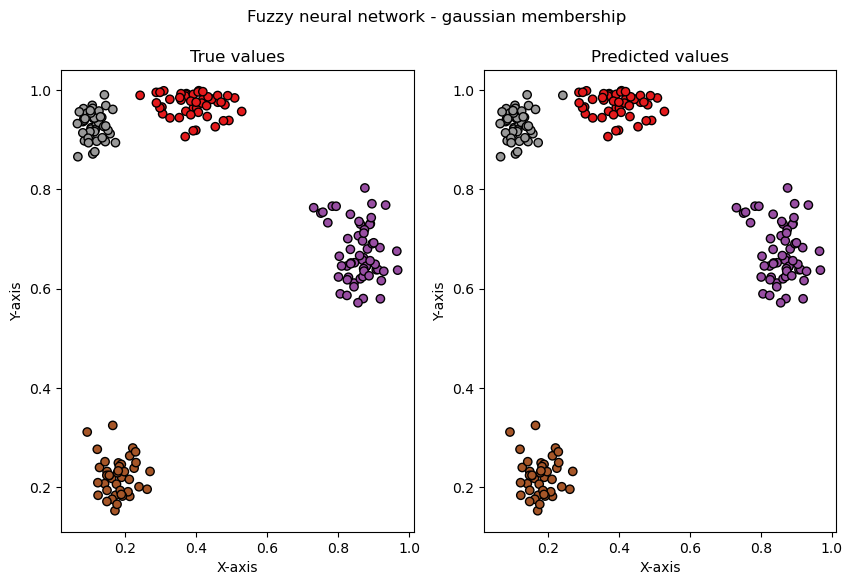

In [94]:
show_prediction('Fuzzy neural network - gaussian membership')

## Visualization of network results

In [95]:
pd.DataFrame(model_info_make_blobs).dropna()

standard_network  \
standard data - own_network [loss/accuracy]:        [0.4097595512866974, 0.9950000047683716]   
standard data - grid_generated_network [loss/ac...              [0.0011522428831085563, 1.0]   
standard data - basic_network [loss/accuracy]:       [1.158273458480835, 0.7799999713897705]   

                                                                                    triangular  \
standard data - own_network [loss/accuracy]:         [0.10167400538921356, 0.9950000047683716]   
standard data - grid_generated_network [loss/ac...  [0.012143590487539768, 0.9950000047683716]   
standard data - basic_network [loss/accuracy]:        [0.7019719481468201, 0.7549999952316284]   

                                                                                 trapezoidal  \
standard data - own_network [loss/accuracy]:        [0.3232649266719818, 0.8650000095367432]   
standard data - grid_generated_network [loss/ac...              [0.27154600620269775, 0.875]   
standard data - basic_network [loss/accuracy]:      [0.9011112451553345, 0.7400000095367432]   

                                                                                    gaussian  
standard data - own_network [loss/accuracy]:                      [0.06550771743059158, 1.0]  
standard data - grid_generated_network [loss/ac...               [0.007531153038144112, 1.0]  
standard data - basic_network [loss/accuracy]:      [0.7161186933517456, 0.9950000047683716]

## Set mining - overlapping data

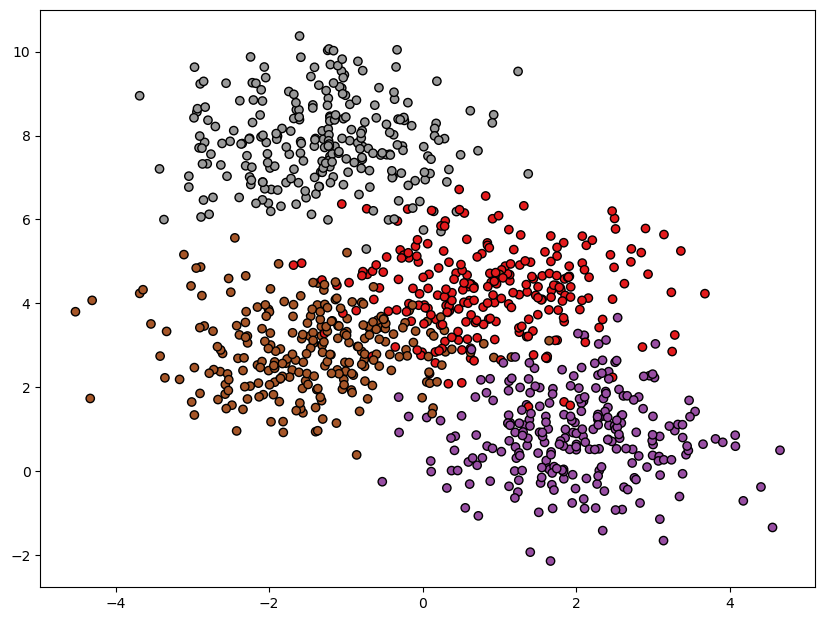

In [96]:
X, labels = make_blobs(n_samples=1000, n_features=2, 
                       centers=4, random_state=0,
                       cluster_std=1.0)
plt.figure(figsize=(10.0, 7.5))
plt.scatter(x=X[:, 0], y=X[:, 1], c=labels, 
            cmap="Set1", edgecolor=(0, 0, 0, 1))
plt.show()

## Training a standard neural network model

In [97]:
X_scaled = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2)

In [98]:
history = ann_1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [99]:
loss, acc = ann_1.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['standard_network']['overlapping data - own_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_1.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.37, Model accuracy: 0.88

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        59
           1       0.94      0.91      0.92        53
           2       0.84      0.86      0.85        42
           3       0.86      0.91      0.88        46

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200



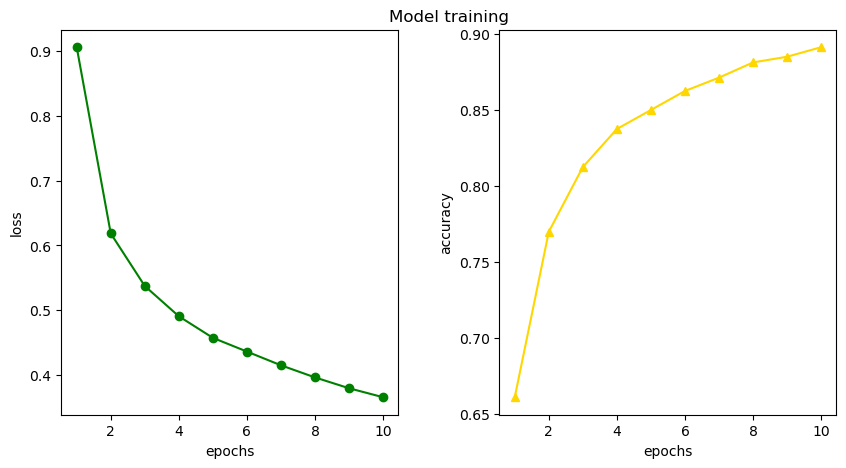

In [100]:
show_training_data()

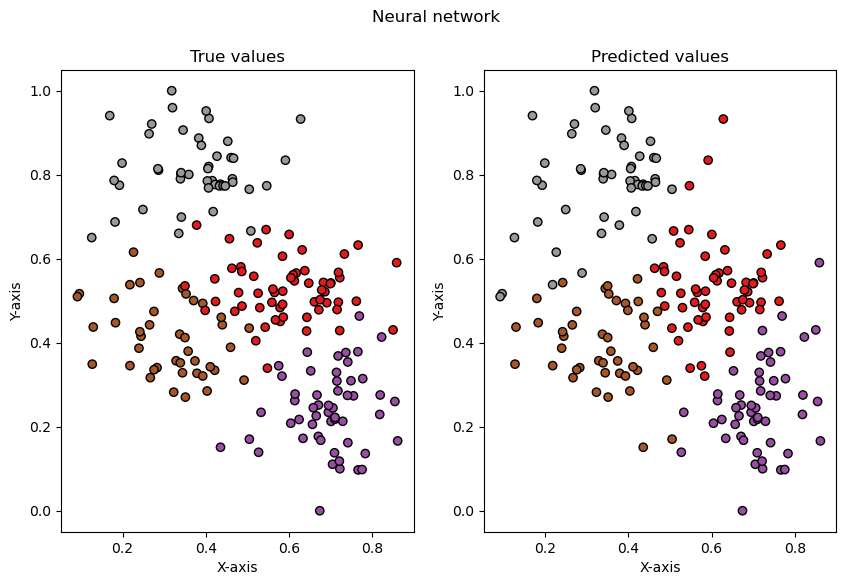

In [101]:
show_prediction('Neural network')

## Network training based on triangular membership function

In [102]:
concat = np.stack([triangular_preprocess(X[:, 0]), triangular_preprocess(X[:, 1])], axis=1)
concat

array([[0.        , 0.        ],
       [0.39553952, 0.5461005 ],
       [0.        , 0.        ],
       ...,
       [0.16042642, 0.        ],
       [0.14665896, 0.        ],
       [0.9001007 , 0.        ]])

In [103]:
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

### Model training

In [104]:
history = ann_1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [105]:
loss, acc = ann_1.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['triangular']['overlapping data - own_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_1.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.61, Model accuracy: 0.80

Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        50
           1       0.96      0.91      0.93        47
           2       0.68      0.80      0.74        54
           3       0.81      0.59      0.68        49

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



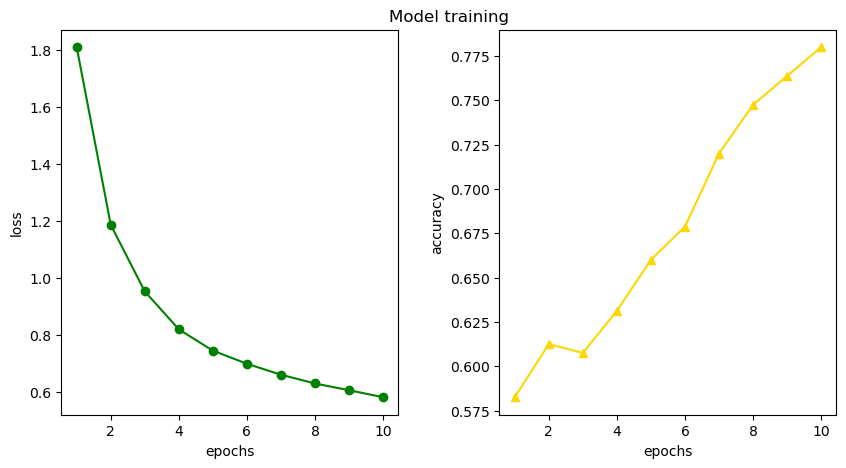

In [106]:
show_training_data()

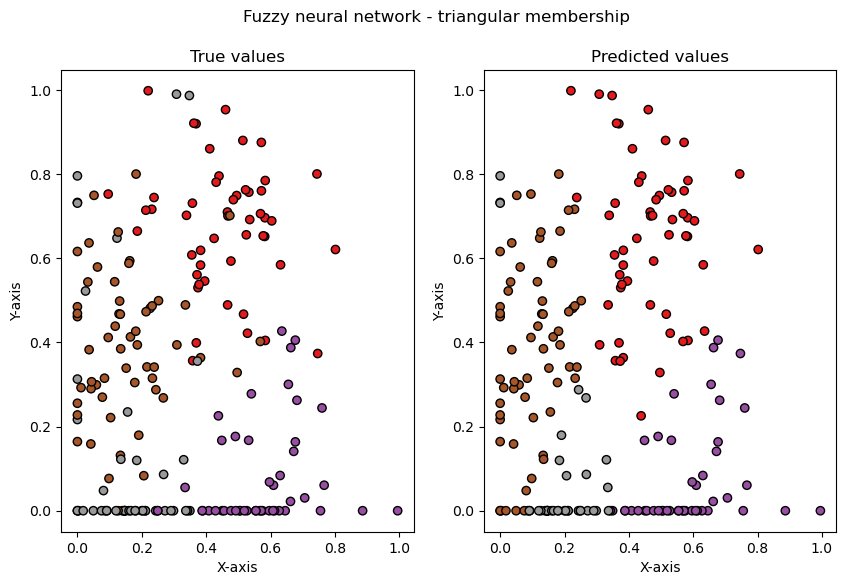

In [107]:
show_prediction('Fuzzy neural network - triangular membership')

## Network training based on trapezoidal membership function

In [108]:
concat = np.stack([trapezoidal_preprocess(X[:, 0]), trapezoidal_preprocess(X[:, 1])], axis=1)
concat

array([[0.        , 0.        ],
       [1.        , 1.        ],
       [0.        , 0.        ],
       ...,
       [0.95359013, 0.        ],
       [0.87175504, 0.        ],
       [0.        , 0.        ]])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

In [110]:
history = ann_1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [111]:
loss, acc = ann_1.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['trapezoidal']['overlapping data - own_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_1.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.90, Model accuracy: 0.54

Classification report: 
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        55
           1       0.60      0.18      0.28        50
           2       0.48      0.53      0.51        45
           3       0.47      0.76      0.58        50

    accuracy                           0.54       200
   macro avg       0.56      0.54      0.51       200
weighted avg       0.56      0.54      0.51       200



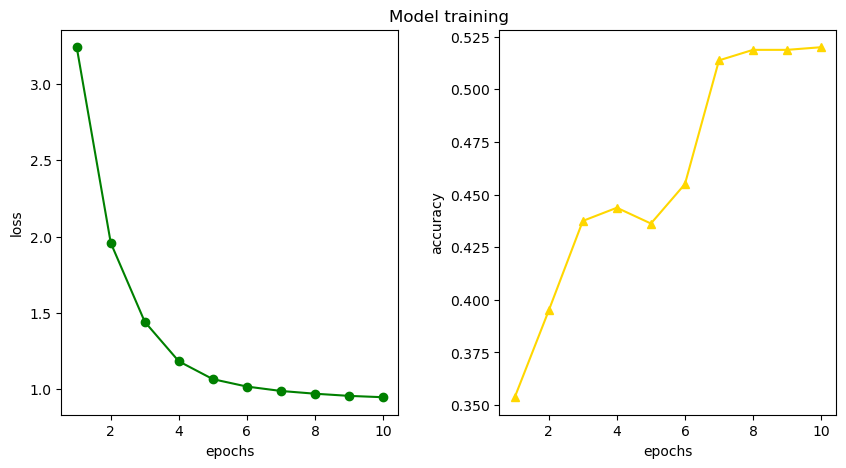

In [112]:
show_training_data()

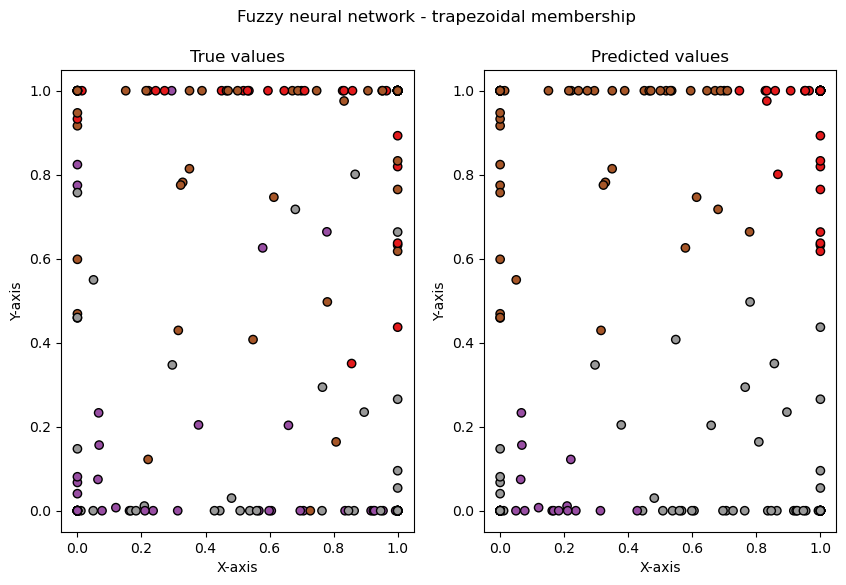

In [113]:
show_prediction('Fuzzy neural network - trapezoidal membership')

## Network training based on Gaussian membership function

In [114]:
concat = np.stack([gaussian_preprocess(X[:, 0]), gaussian_preprocess(X[:, 1])], axis=1)
concat

array([[0.24268592, 0.9620147 ],
       [0.62038174, 0.91699517],
       [0.20312135, 0.9231048 ],
       ...,
       [0.39810135, 0.92766753],
       [0.38616006, 0.96699637],
       [0.98704429, 0.62525511]])

In [115]:
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

### Model training

In [116]:
history = ann_1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model prediction

In [117]:
loss, acc = ann_1.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['gaussian']['overlapping data - own_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_1.predict(X_test, verbose=0), axis=1)
print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.81, Model accuracy: 0.75

Classification report: 
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        51
           1       0.96      0.98      0.97        52
           2       0.70      0.64      0.67        55
           3       0.55      0.40      0.47        42

    accuracy                           0.74       200
   macro avg       0.73      0.73      0.72       200
weighted avg       0.74      0.74      0.73       200



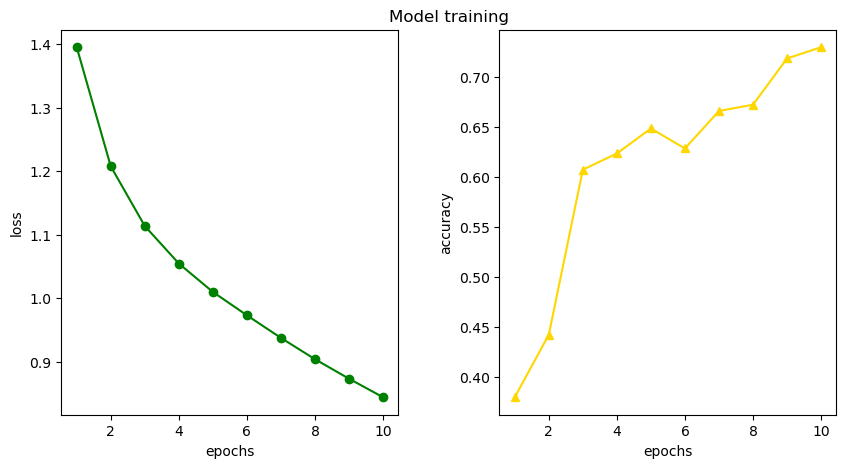

In [118]:
show_training_data()

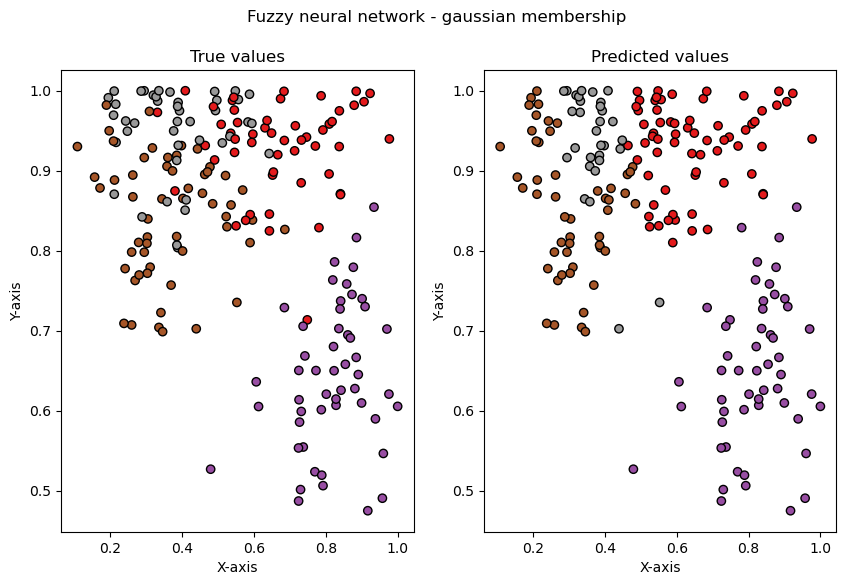

In [119]:
show_prediction('Fuzzy neural network - gaussian membership')

## Visualization of network results

In [120]:
pd.DataFrame(model_info_make_blobs).dropna()

standard_network  \
standard data - own_network [loss/accuracy]:        [0.4097595512866974, 0.9950000047683716]   
standard data - grid_generated_network [loss/ac...              [0.0011522428831085563, 1.0]   
standard data - basic_network [loss/accuracy]:       [1.158273458480835, 0.7799999713897705]   
overlapping data - own_network [loss/accuracy]:                 [0.37042757868766785, 0.875]   

                                                                                    triangular  \
standard data - own_network [loss/accuracy]:         [0.10167400538921356, 0.9950000047683716]   
standard data - grid_generated_network [loss/ac...  [0.012143590487539768, 0.9950000047683716]   
standard data - basic_network [loss/accuracy]:        [0.7019719481468201, 0.7549999952316284]   
overlapping data - own_network [loss/accuracy]:        [0.6136391162872314, 0.800000011920929]   

                                                                                 trapezoidal  \
standard data - own_network [loss/accuracy]:        [0.3232649266719818, 0.8650000095367432]   
standard data - grid_generated_network [loss/ac...              [0.27154600620269775, 0.875]   
standard data - basic_network [loss/accuracy]:      [0.9011112451553345, 0.7400000095367432]   
overlapping data - own_network [loss/accuracy]:     [0.9033413529396057, 0.5400000214576721]   

                                                                                    gaussian  
standard data - own_network [loss/accuracy]:                      [0.06550771743059158, 1.0]  
standard data - grid_generated_network [loss/ac...               [0.007531153038144112, 1.0]  
standard data - basic_network [loss/accuracy]:      [0.7161186933517456, 0.9950000047683716]  
overlapping data - own_network [loss/accuracy]:     [0.8069770932197571, 0.7450000047683716]

## Training a model based on GridSearchCV

In [121]:
X_scaled = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2)

### Model training

In [122]:
history = ann_2.fit(X_train, y_train, epochs=grid.best_params_['epochs'], 
                    batch_size=grid.best_params_['batch_size'], 
                    verbose=0
                )

### Model predictions

In [123]:
loss, acc = ann_2.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['standard_network']['overlapping data - grid_generated_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_2.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.21, Model accuracy: 0.92

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        48
           1       0.92      0.98      0.95        50
           2       0.90      0.90      0.90        50
           3       0.98      0.94      0.96        52

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



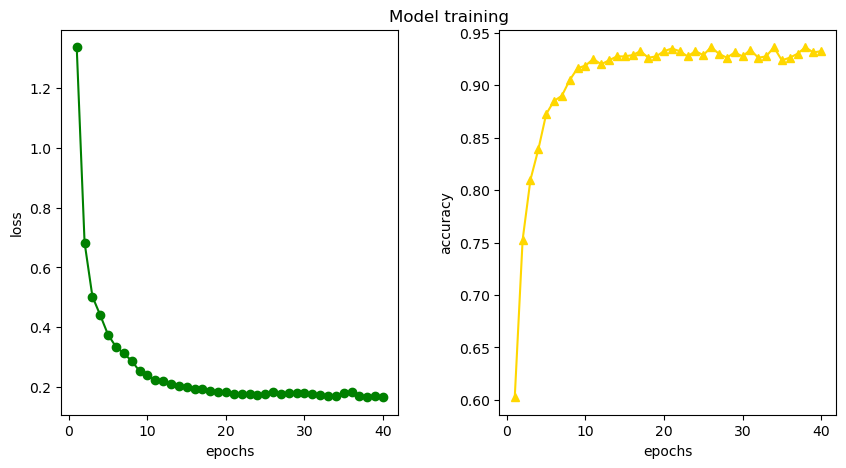

In [124]:
show_training_data()

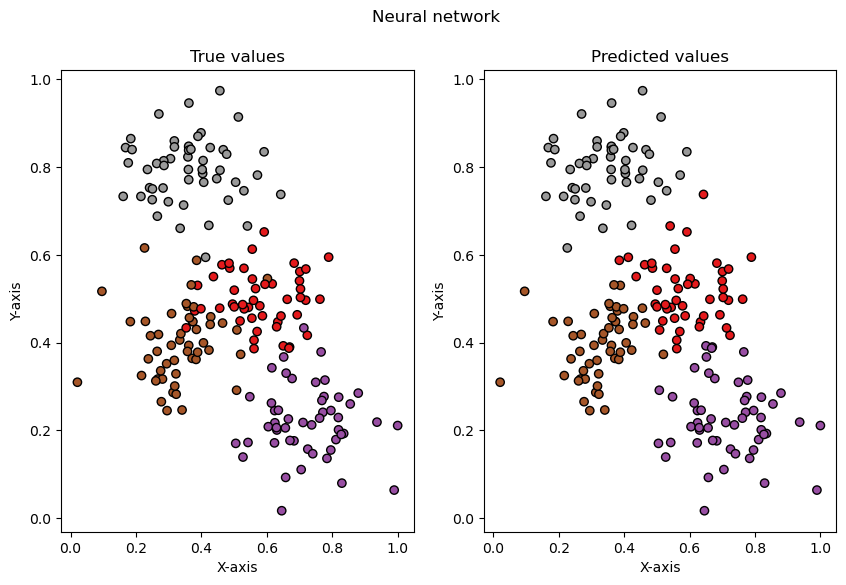

In [125]:
show_prediction('Neural network')

## Training a network created using Grid Search CV based on a triangular membership function

In [126]:
concat = np.stack([triangular_preprocess(X[:, 0]), triangular_preprocess(X[:, 1])], axis=1)
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

### Model training

In [127]:
history = ann_2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [128]:
loss, acc = ann_2.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['triangular']['overlapping data - grid_generated_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_2.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.51, Model accuracy: 0.83

Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        54
           1       0.93      0.84      0.88        50
           2       0.80      0.88      0.83        49
           3       0.72      0.81      0.76        47

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.83      0.84       200



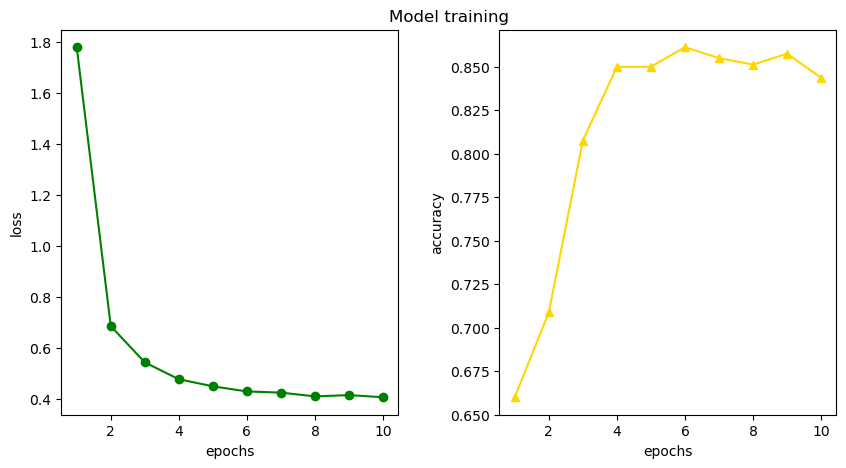

In [129]:
show_training_data()

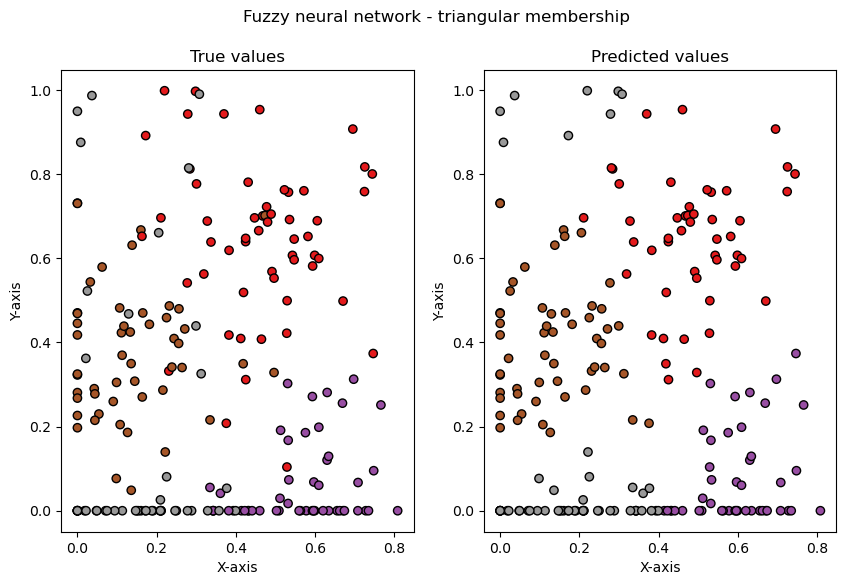

In [130]:
show_prediction('Fuzzy neural network - triangular membership')

## Training a network created using Grid Search CV based on a trapezoidal membership function

In [131]:
concat = np.stack([trapezoidal_preprocess(X[:, 0]), trapezoidal_preprocess(X[:, 1])], axis=1)
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

In [132]:
history = ann_2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

In [133]:
loss, acc = ann_2.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['trapezoidal']['overlapping data - grid_generated_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_2.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.93, Model accuracy: 0.54

Classification report: 
              precision    recall  f1-score   support

           0       0.58      0.91      0.71        58
           1       0.47      0.50      0.48        44
           2       0.52      0.26      0.35        54
           3       0.56      0.43      0.49        44

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.51       200
weighted avg       0.53      0.54      0.51       200



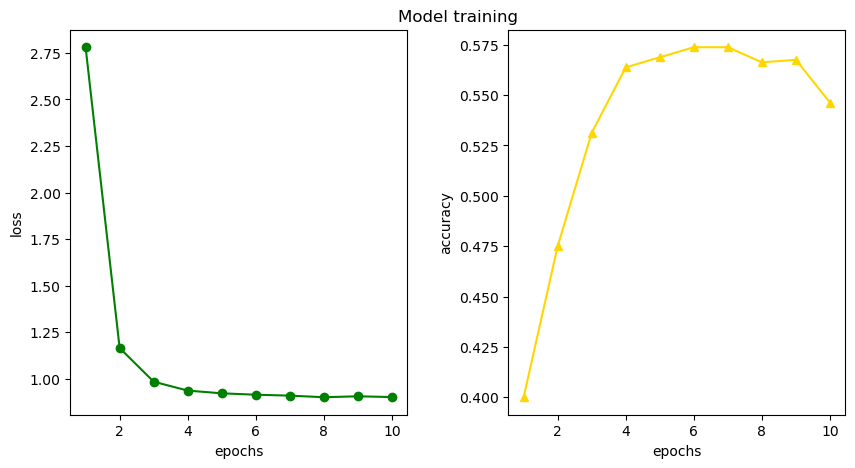

In [134]:
show_training_data()

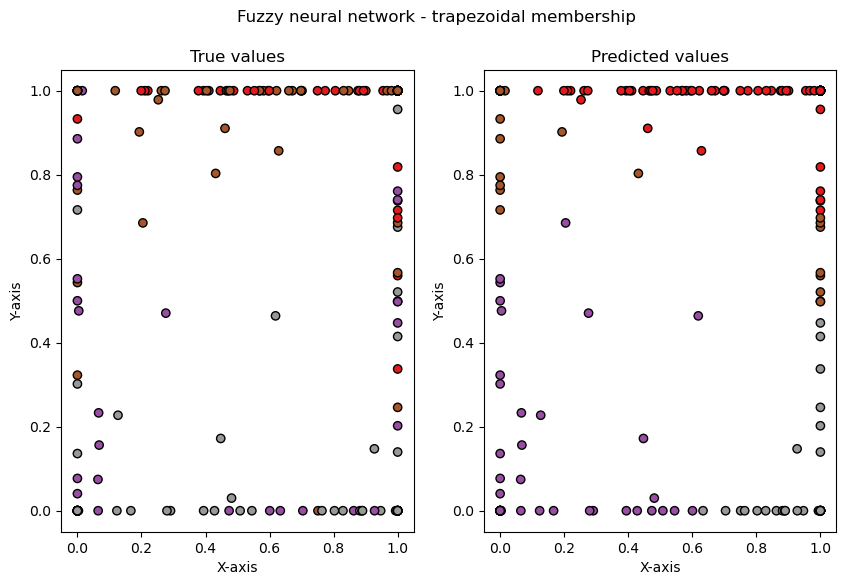

In [135]:
show_prediction('Fuzzy neural network - trapezoidal membership')

## Training a network created using Grid Search CV based on a Gaussian membership function

In [136]:
concat = np.stack([gaussian_preprocess(X[:, 0]), gaussian_preprocess(X[:, 1])], axis=1)
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

In [137]:
history = ann_2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

In [138]:
loss, acc = ann_2.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['gaussian']['overlapping data - grid_generated_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_2.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.45, Model accuracy: 0.81

Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        48
           1       0.98      0.96      0.97        55
           2       0.82      0.68      0.74        47
           3       0.71      0.78      0.74        50

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.82       200



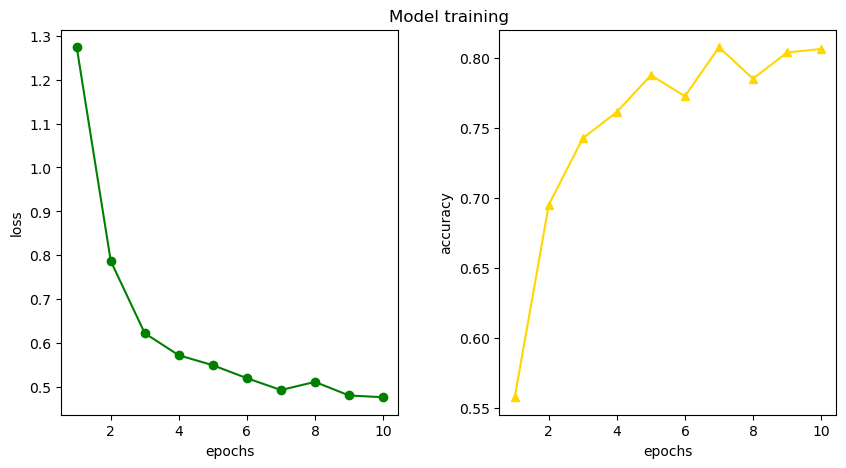

In [139]:
show_training_data()

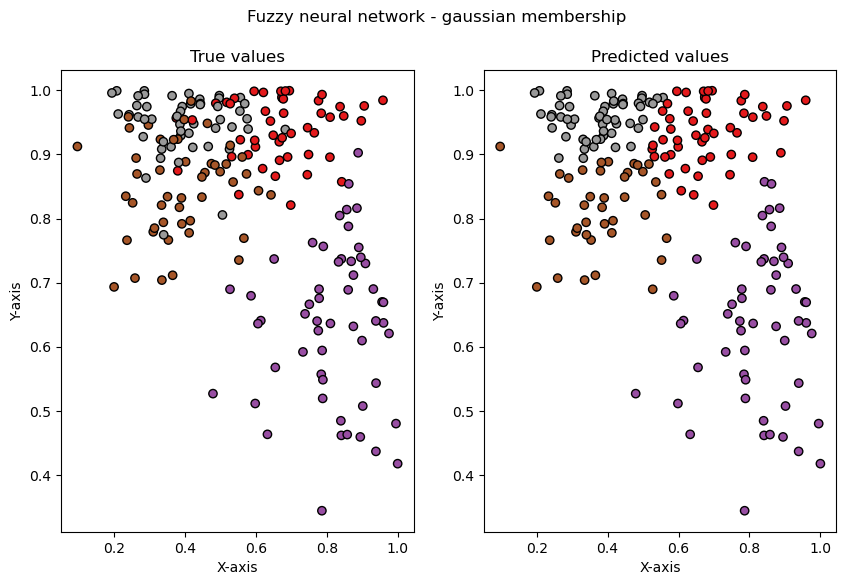

In [140]:
show_prediction('Fuzzy neural network - gaussian membership')

## Training a simple neural network model

In [141]:
X_scaled = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2)

In [142]:
history = ann_3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [143]:
loss, acc = ann_3.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['standard_network']['overlapping data - basic_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_3.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.87, Model accuracy: 0.81

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.49      0.63        53
           1       0.62      0.91      0.73        44
           2       0.87      0.89      0.88        46
           3       0.93      0.95      0.94        57

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.80       200
weighted avg       0.83      0.81      0.80       200



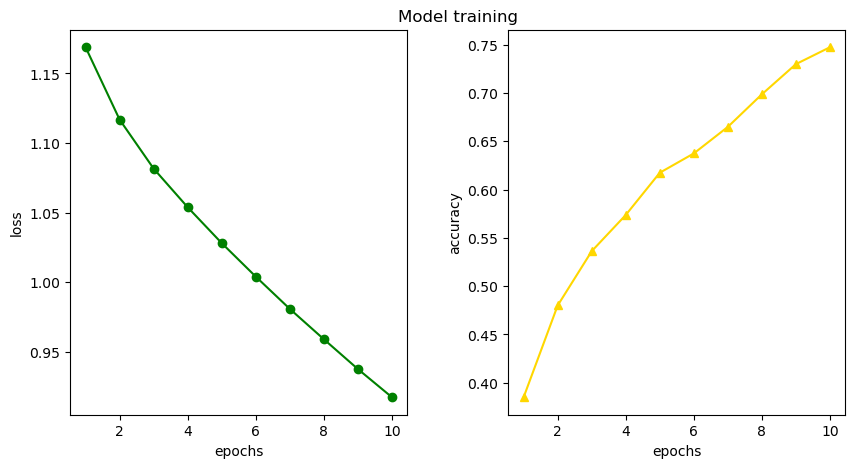

In [144]:
show_training_data()

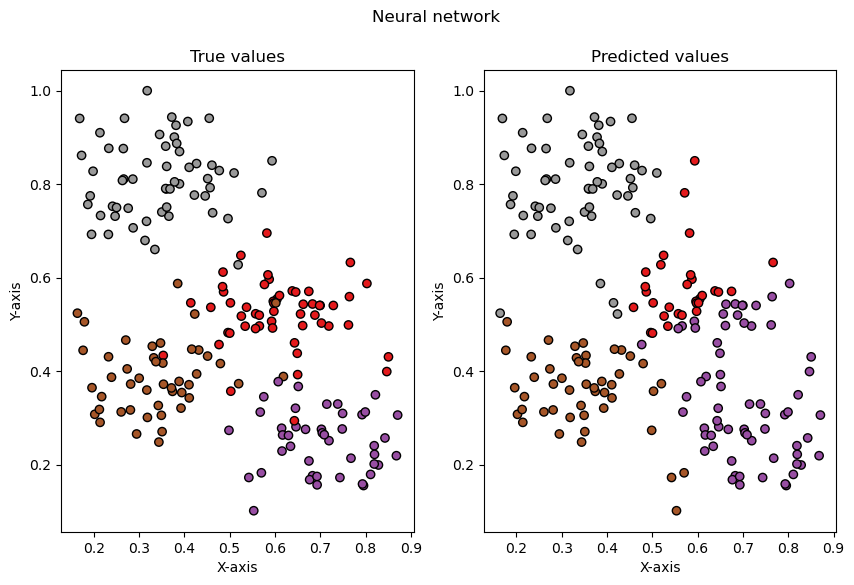

In [145]:
show_prediction('Neural network')

## Network training based on triangular membership function

In [146]:
concat = np.stack([triangular_preprocess(X[:, 0]), triangular_preprocess(X[:, 1])], axis=1)
concat

array([[0.        , 0.        ],
       [0.39553952, 0.5461005 ],
       [0.        , 0.        ],
       ...,
       [0.16042642, 0.        ],
       [0.14665896, 0.        ],
       [0.9001007 , 0.        ]])

In [147]:
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

### Model training

In [148]:
history = ann_3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [149]:
loss, acc = ann_3.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['triangular']['overlapping data - basic_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_3.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.95, Model accuracy: 0.56

Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.77      0.83        56
           1       0.91      1.00      0.95        39
           2       0.39      0.42      0.41        59
           3       0.13      0.13      0.13        46

    accuracy                           0.56       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.57      0.56      0.57       200



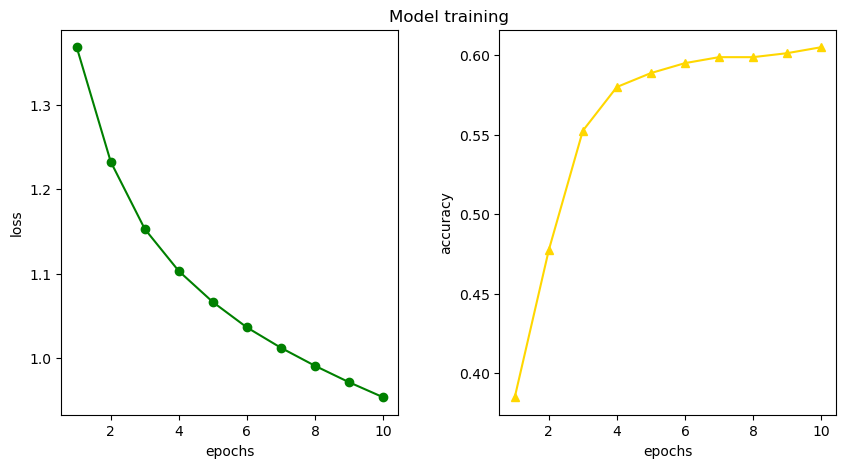

In [150]:
show_training_data()

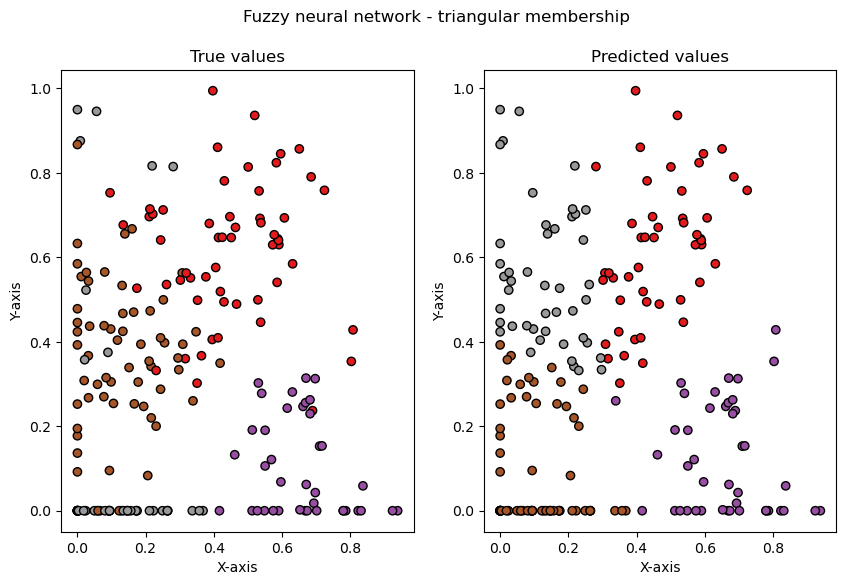

In [151]:
show_prediction('Fuzzy neural network - triangular membership')

## Network training based on trapezoidal membership function

In [152]:
concat = np.stack([trapezoidal_preprocess(X[:, 0]), trapezoidal_preprocess(X[:, 1])], axis=1)
concat

array([[0.        , 0.        ],
       [1.        , 1.        ],
       [0.        , 0.        ],
       ...,
       [0.95359013, 0.        ],
       [0.87175504, 0.        ],
       [0.        , 0.        ]])

In [153]:
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

### Model training

In [154]:
history = ann_3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [155]:
loss, acc = ann_3.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['trapezoidal']['overlapping data - basic_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_3.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 1.36, Model accuracy: 0.39

Classification report: 
              precision    recall  f1-score   support

           0       0.50      0.79      0.61        47
           1       0.28      0.23      0.25        47
           2       0.39      0.45      0.41        65
           3       0.09      0.02      0.04        41

    accuracy                           0.39       200
   macro avg       0.31      0.37      0.33       200
weighted avg       0.33      0.39      0.35       200



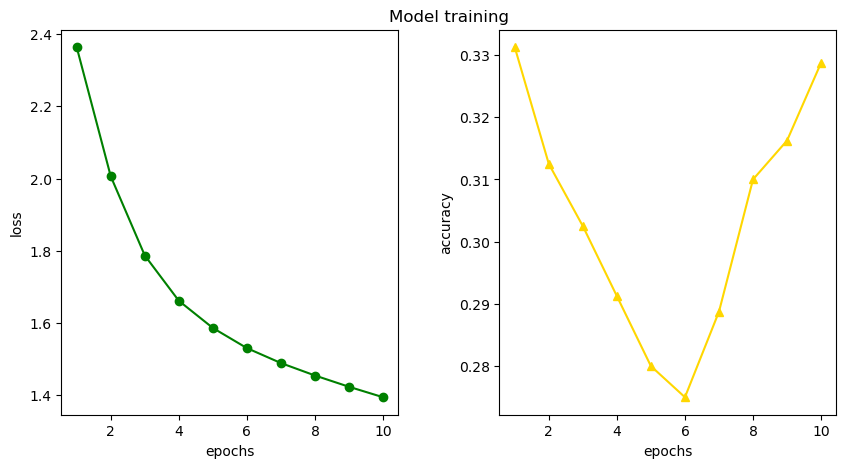

In [156]:
show_training_data()

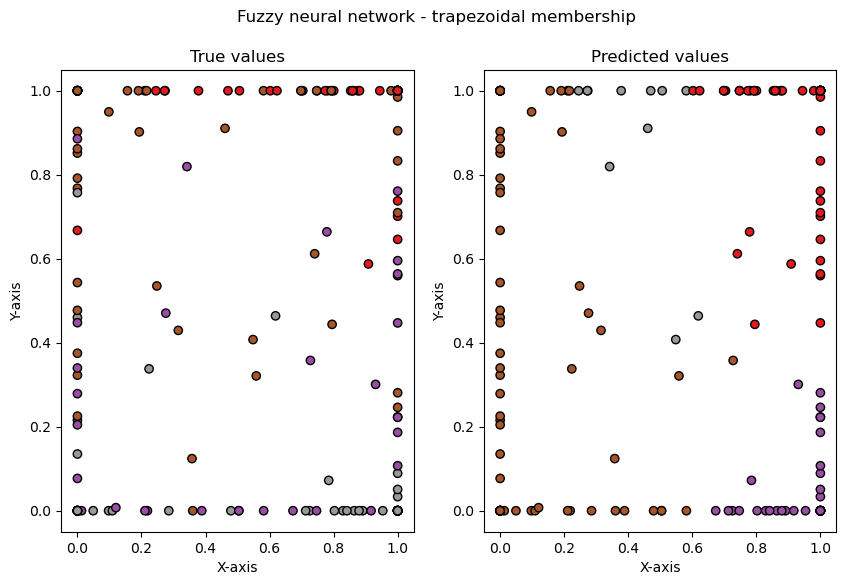

In [157]:
show_prediction('Fuzzy neural network - trapezoidal membership')

## Network training based on Gaussian membership function

In [158]:
concat = np.stack([gaussian_preprocess(X[:, 0]), gaussian_preprocess(X[:, 1])], axis=1)
concat

array([[0.24268592, 0.9620147 ],
       [0.62038174, 0.91699517],
       [0.20312135, 0.9231048 ],
       ...,
       [0.39810135, 0.92766753],
       [0.38616006, 0.96699637],
       [0.98704429, 0.62525511]])

In [159]:
X_train, X_test, y_train, y_test = train_test_split(concat, labels, test_size=0.2)

### Model training

In [160]:
history = ann_3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

### Model predictions

In [161]:
loss, acc = ann_3.evaluate(X_test, y_test, verbose=0)
model_info_make_blobs['gaussian']['overlapping data - basic_network [loss/accuracy]:'] = [loss, acc]

y_pred = np.argmax(ann_3.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 1.00, Model accuracy: 0.67

Classification report: 
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        49
           1       0.94      0.92      0.93        50
           2       0.45      0.71      0.55        48
           3       0.56      0.17      0.26        53

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.64       200
weighted avg       0.67      0.67      0.63       200



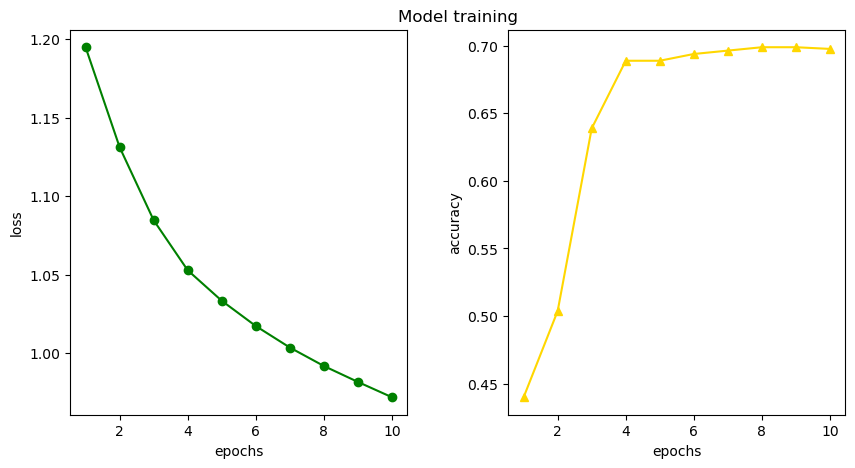

In [162]:
show_training_data()

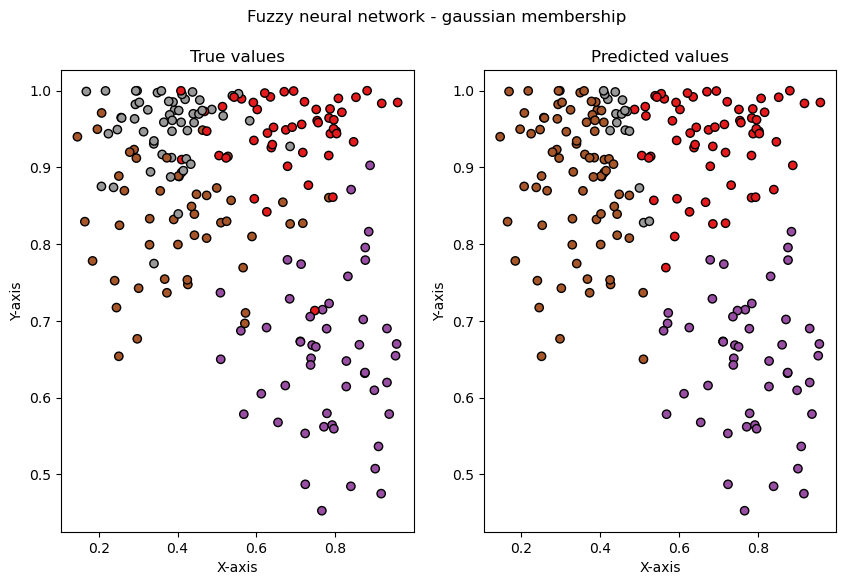

In [163]:
show_prediction('Fuzzy neural network - gaussian membership')

In [164]:
history = ann_3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

## Visualization of network results

In [165]:
pd.DataFrame(model_info_make_blobs)

standard_network  \
standard data - own_network [loss/accuracy]:         [0.4097595512866974, 0.9950000047683716]   
standard data - grid_generated_network [loss/ac...               [0.0011522428831085563, 1.0]   
standard data - basic_network [loss/accuracy]:        [1.158273458480835, 0.7799999713897705]   
overlapping data - own_network [loss/accuracy]:                  [0.37042757868766785, 0.875]   
overlapping data - grid_generated_network [loss...  [0.21447604894638062, 0.9150000214576721]   
overlapping data - basic_network [loss/accuracy]:    [0.8710419535636902, 0.8050000071525574]   

                                                                                    triangular  \
standard data - own_network [loss/accuracy]:         [0.10167400538921356, 0.9950000047683716]   
standard data - grid_generated_network [loss/ac...  [0.012143590487539768, 0.9950000047683716]   
standard data - basic_network [loss/accuracy]:        [0.7019719481468201, 0.7549999952316284]   
overlapping data - own_network [loss/accuracy]:        [0.6136391162872314, 0.800000011920929]   
overlapping data - grid_generated_network [loss...     [0.514006495475769, 0.8349999785423279]   
overlapping data - basic_network [loss/accuracy]:      [0.946860134601593, 0.5649999976158142]   

                                                                                 trapezoidal  \
standard data - own_network [loss/accuracy]:        [0.3232649266719818, 0.8650000095367432]   
standard data - grid_generated_network [loss/ac...              [0.27154600620269775, 0.875]   
standard data - basic_network [loss/accuracy]:      [0.9011112451553345, 0.7400000095367432]   
overlapping data - own_network [loss/accuracy]:     [0.9033413529396057, 0.5400000214576721]   
overlapping data - grid_generated_network [loss...  [0.9300552606582642, 0.5400000214576721]   
overlapping data - basic_network [loss/accuracy]:   [1.355358600616455, 0.38999998569488525]   

                                                                                     gaussian  
standard data - own_network [loss/accuracy]:                       [0.06550771743059158, 1.0]  
standard data - grid_generated_network [loss/ac...                [0.007531153038144112, 1.0]  
standard data - basic_network [loss/accuracy]:       [0.7161186933517456, 0.9950000047683716]  
overlapping data - own_network [loss/accuracy]:      [0.8069770932197571, 0.7450000047683716]  
overlapping data - grid_generated_network [loss...  [0.45454466342926025, 0.8149999976158142]  
overlapping data - basic_network [loss/accuracy]:    [0.9959090352058411, 0.6650000214576721]

## Exploring the data set - seattle-weather

### Initial data exploration and data refinement

In [166]:
df = pd.read_csv('seattle-weather.csv')
df.head()

date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain

In [167]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [168]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [170]:
df.describe()

precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

In [171]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

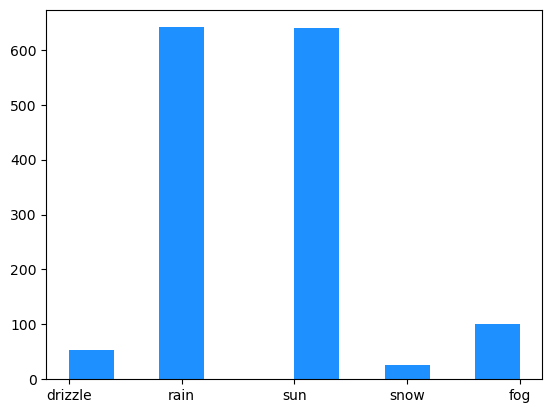

In [172]:
plt.hist(df['weather'], color='dodgerblue')
plt.show()

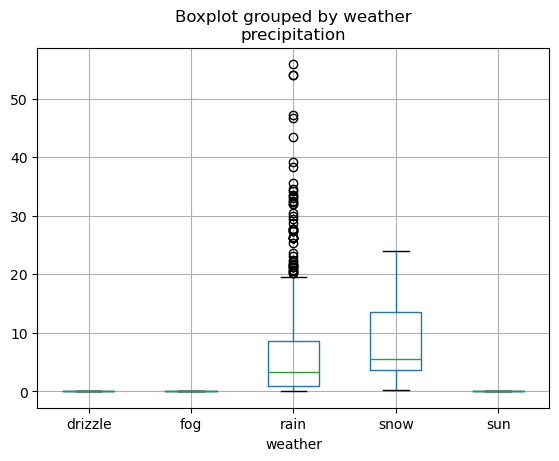

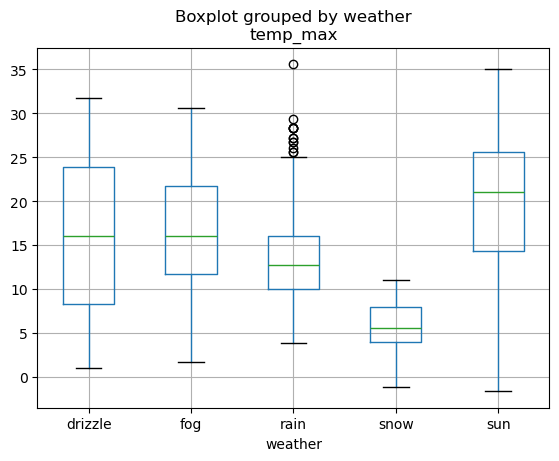

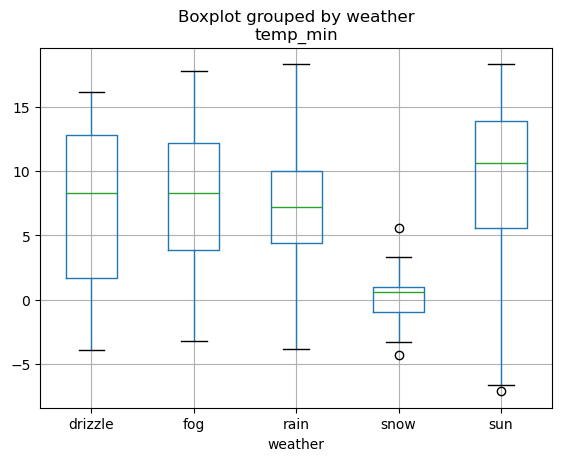

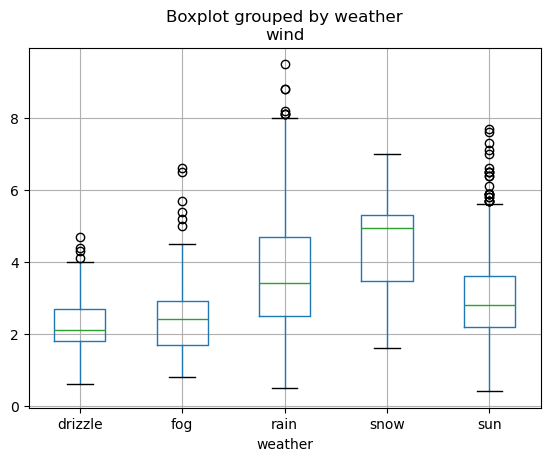

In [173]:
for i in df.columns.drop(['date', 'weather']):
    df.boxplot(by='weather', column=i)

In [174]:
df.corr(numeric_only = True).style.background_gradient('Wistia')

In [175]:
weather_unique_lbs = np.unique(df['weather'].values)
weather_unique_lbs

array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype=object)

In [176]:
idx_lst = []
for i in weather_unique_lbs:
    idx = df[df['weather'] == i]['weather'].index[0]
    idx_lst.append(idx)
idx_lst

[0, 192, 1, 13, 7]

In [177]:
start_y = int(df['date'].dropna().min()[:4])
end_y = int(df['date'].dropna().max()[:4])
start_y, end_y

(2012, 2015)

### Extract average data for each year
#### Objects (dictionaries) weather0 - weather4 are created that correspond to each type of weather.
#### These objects have a key as a year and a value as a list consisting of averaged values ​​for: precipitation, maximum temperature, minimum temperature and wind

In [178]:
# weather_0 = {2012: [p, tmax, tmin, wind]}
weather_0 = {k: [] for k in range(start_y, end_y+1)}
weather_1 = {k: [] for k in range(start_y, end_y+1)}
weather_2 = {k: [] for k in range(start_y, end_y+1)}
weather_3 = {k: [] for k in range(start_y, end_y+1)}
weather_4 = {k: [] for k in range(start_y, end_y+1)}
for y in range(start_y, end_y+1):
    for i, w in {'drizzle': weather_0, 'fog': weather_1, 'rain': weather_2, 'snow': weather_3, 'sun': weather_4}.items():
        if len(df[(df['weather'] == i) & (df['date'].str.startswith(str(y)))]):
            m = df[(df['weather'] == i) & (df['date'].str.startswith(str(y)))].mean(numeric_only=True)
            w[y].append(m['precipitation'])
            w[y].append(m['temp_max'])
            w[y].append(m['temp_min'])
            w[y].append(m['wind'])
print(weather_0)
print(weather_1)
print(weather_2)
print(weather_3)
print(weather_4)

{2012: [0.0, 17.374193548387094, 8.667741935483871, 2.512903225806452], 2013: [0.0, 7.4399999999999995, 0.66, 2.0000000000000004], 2014: [], 2015: [0.0, 27.700000000000006, 14.042857142857144, 2.5142857142857147]}
{2012: [0.0, 21.1, 9.34, 2.4200000000000004], 2013: [0.0, 19.387500000000003, 9.89375, 2.1125], 2014: [0.0, 17.84642857142857, 8.678571428571429, 2.7678571428571432], 2015: [0.0, 14.944230769230769, 6.882692307692308, 2.446153846153846]}
{2012: [5.37329842931937, 12.807329842931937, 6.76439790575916, 3.625130890052356], 2013: [5.151898734177215, 13.625316455696204, 7.907594936708861, 3.573417721518987], 2014: [8.270945945945945, 14.207432432432434, 8.287162162162161, 3.8837837837837834], 2015: [7.91111111111111, 13.352083333333333, 7.614583333333333, 3.615277777777778]}
{2012: [9.50952380952381, 5.395238095238096, 0.3047619047619048, 4.480952380952381], 2013: [4.666666666666667, 7.2, 0.7333333333333334, 3.5666666666666664], 2014: [4.35, 5.0, -2.4, 4.949999999999999], 2015: []

#### Function that replaces the value of an empty list (in the above objects) with the value None (making it easier to create a chart)

In [179]:
def replace_with_none(dct):
    for k, v in dct.items():
        if not v:
            dct[k] = None
    return dct

#### Calling functions on objects

In [180]:
weather_0 = replace_with_none(weather_0)
weather_1 = replace_with_none(weather_1)
weather_2 = replace_with_none(weather_2)
weather_3 = replace_with_none(weather_3)
weather_4 = replace_with_none(weather_4)

#### Preview of object values

In [181]:
print(weather_0)
print(weather_1)
print(weather_2)
print(weather_3)
print(weather_4)

{2012: [0.0, 17.374193548387094, 8.667741935483871, 2.512903225806452], 2013: [0.0, 7.4399999999999995, 0.66, 2.0000000000000004], 2014: None, 2015: [0.0, 27.700000000000006, 14.042857142857144, 2.5142857142857147]}
{2012: [0.0, 21.1, 9.34, 2.4200000000000004], 2013: [0.0, 19.387500000000003, 9.89375, 2.1125], 2014: [0.0, 17.84642857142857, 8.678571428571429, 2.7678571428571432], 2015: [0.0, 14.944230769230769, 6.882692307692308, 2.446153846153846]}
{2012: [5.37329842931937, 12.807329842931937, 6.76439790575916, 3.625130890052356], 2013: [5.151898734177215, 13.625316455696204, 7.907594936708861, 3.573417721518987], 2014: [8.270945945945945, 14.207432432432434, 8.287162162162161, 3.8837837837837834], 2015: [7.91111111111111, 13.352083333333333, 7.614583333333333, 3.615277777777778]}
{2012: [9.50952380952381, 5.395238095238096, 0.3047619047619048, 4.480952380952381], 2013: [4.666666666666667, 7.2, 0.7333333333333334, 3.5666666666666664], 2014: [4.35, 5.0, -2.4, 4.949999999999999], 2015: 

### Function that gets rid of a key from an object (dictionary) where the value is set to None

In [182]:
def get_val(dct, idx):
    res = {k: None for k in range(start_y, end_y+1)}
    for y in range(start_y, end_y+1):
        if dct[y] is not None:
            res[y] = dct[y][idx]
        else:
            del res[y]
    return res

### Function for data visualization

In [183]:
def plot_data(ylab, idx, weather_0, weather_1, weather_2,
              weather_3, weather_4):
    w_0 = get_val(weather_0, idx)
    w_1 = get_val(weather_1, idx)
    w_2 = get_val(weather_2, idx)
    w_3 = get_val(weather_3, idx)
    w_4 = get_val(weather_4, idx)

    figure, axes = plt.subplots(5, 1, figsize=(10, 7))
    figure.tight_layout()
    for ax in axes.flat:
        ax.set_xlabel('Rok')
        ax.set_ylabel(ylab)

    colors = ['deepskyblue', 'orange', 'purple', 'olive', 'green']
    
    for i in range(5):
        var = locals()[f'w_{i}']
        axes[i].plot([k for k in var.keys()], [k for k in var.values()], 
                     label=weather_unique_lbs[i], c=colors[i], marker='o')
        axes[i].legend()
        axes[i].grid(axis='y')
    
    plt.legend()
    plt.show()

### Visualization of averaged data

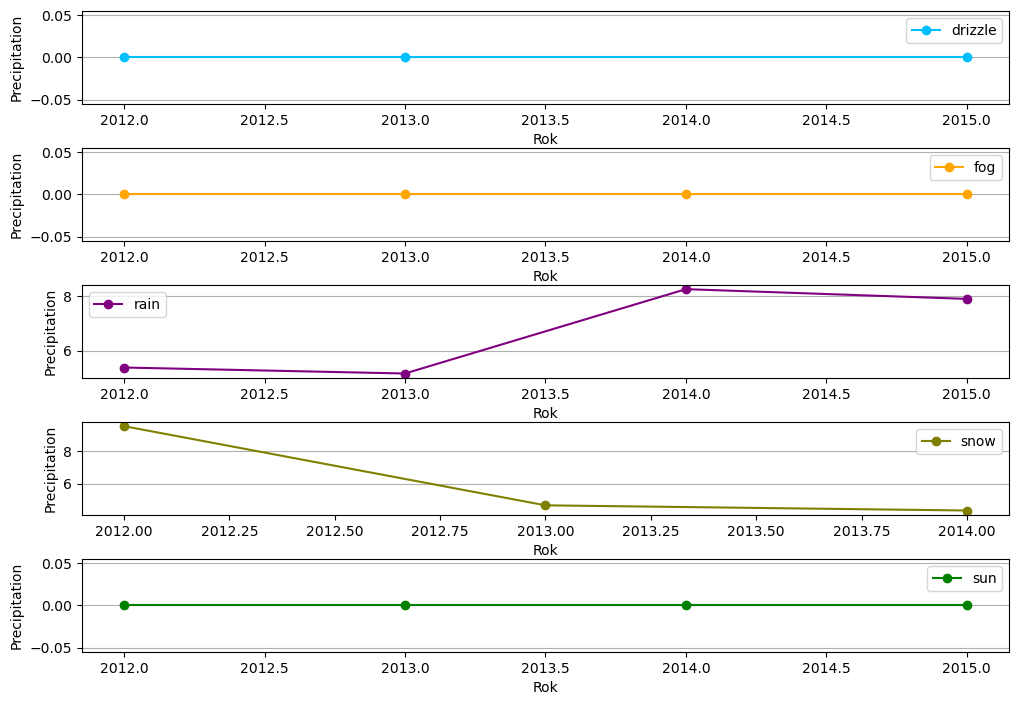

In [184]:
plot_data('Precipitation', 0, weather_0, weather_1, weather_2, weather_3, weather_4)

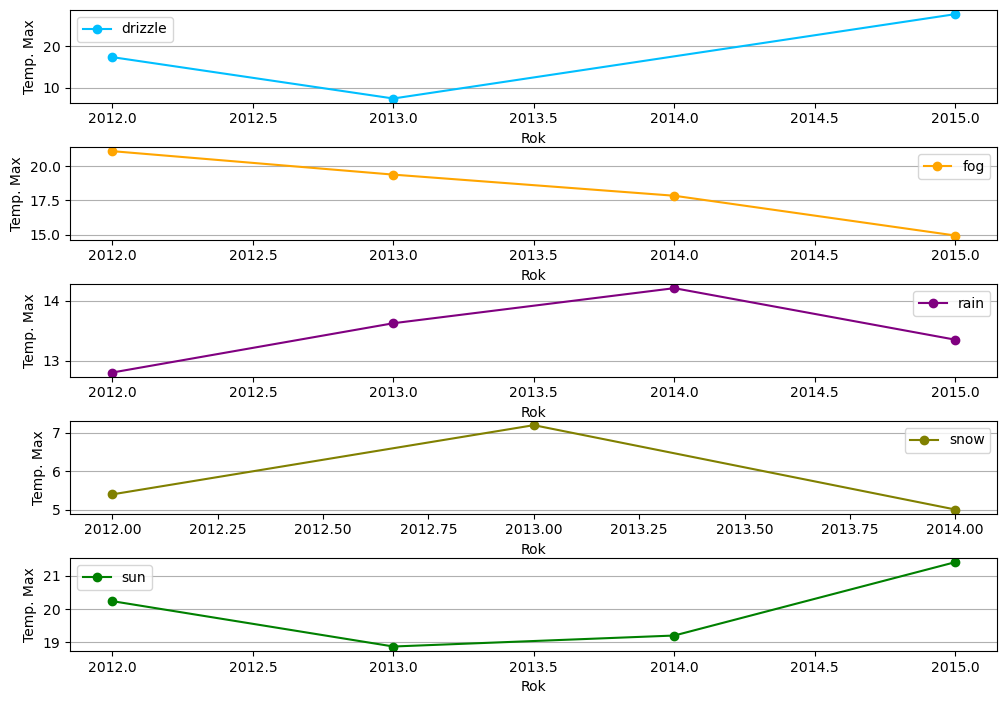

In [185]:
plot_data('Temp. Max', 1, weather_0, weather_1, weather_2, weather_3, weather_4)

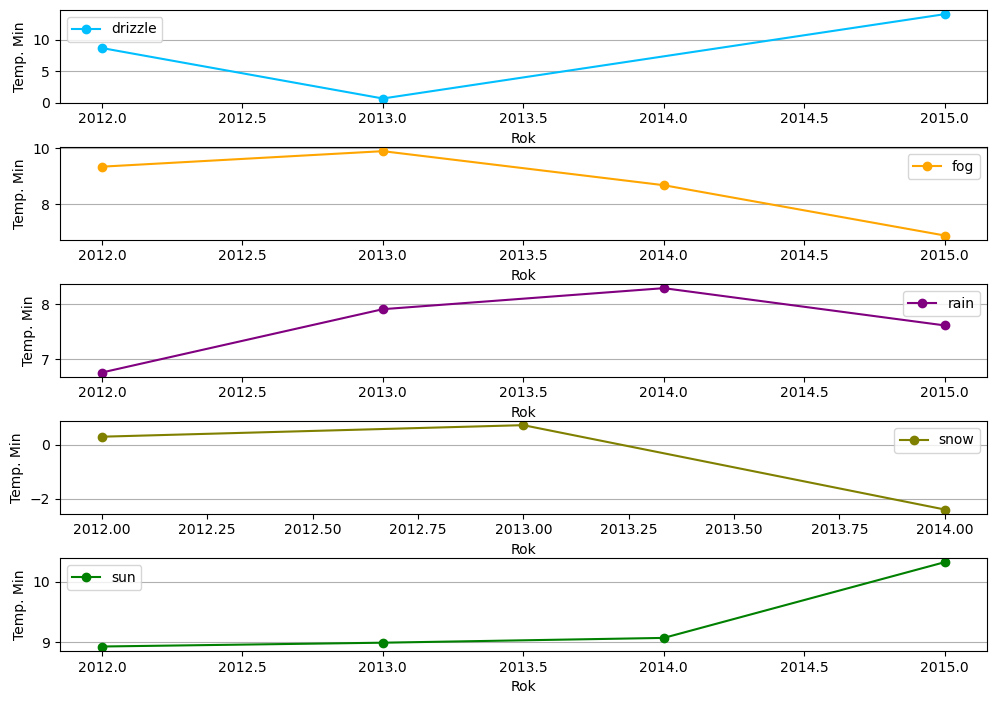

In [186]:
plot_data('Temp. Min', 2, weather_0, weather_1, weather_2, weather_3, weather_4)

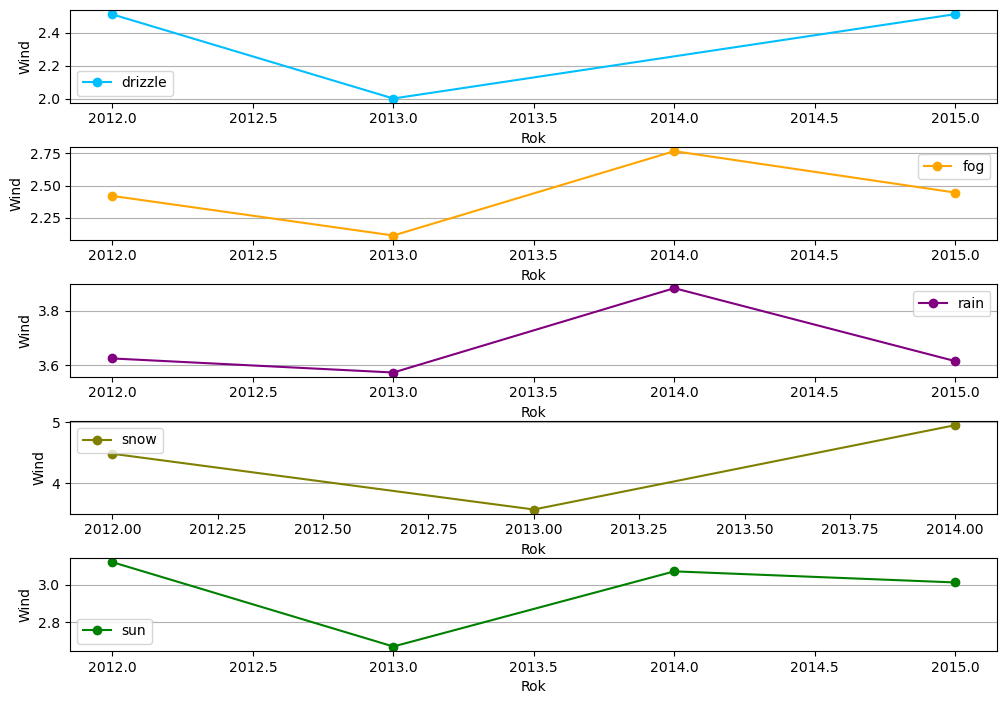

In [187]:
plot_data('Wind', 3, weather_0, weather_1, weather_2, weather_3, weather_4)

## Adding missing values ​​- so that each class has the same number of records (this is to prevent the model from overfitting)

In [188]:
df['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [189]:
df['weather'].value_counts().max()

641

In [190]:
df.columns.drop('date')

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [191]:
df['weather'].value_counts().index

Index(['rain', 'sun', 'fog', 'drizzle', 'snow'], dtype='object', name='weather')

In [192]:
len(df[df['weather'] == 'fog'])

101

In [193]:
df.index.max()

1460

In [194]:
df[df['weather'] == 'sun'].mean(numeric_only=True)

precipitation     0.000000
temp_max         19.861875
temp_min          9.343750
wind              2.956406
dtype: float64

In [195]:
df.tail()

date  precipitation  temp_max  temp_min  wind weather
1456  2015-12-27            8.6       4.4       1.7   2.9    rain
1457  2015-12-28            1.5       5.0       1.7   1.3    rain
1458  2015-12-29            0.0       7.2       0.6   2.6     fog
1459  2015-12-30            0.0       5.6      -1.0   3.4     sun
1460  2015-12-31            0.0       5.6      -2.1   3.5     sun

In [196]:
df[df['weather'] == 'sun'].std(numeric_only=True)

precipitation    0.000000
temp_max         7.698258
temp_min         5.508277
wind             1.164077
dtype: float64

### Function filling missing data - for each class with missing data it creates a new record based on the mean and standard deviation

In [197]:
def append_missing_values():
    max_len = df['weather'].value_counts().max() # 641
    weather = df['weather'].value_counts().index # Index(['rain', 'sun', 'fog', 'drizzle', 'snow'], dtype='object')

    for w in weather:
        # for each type of weather - creation of averages and standard deviation
        mean_percipation, mean_temp_max, mean_temp_min, mean_wind = df[df['weather'] == w].mean(numeric_only=True)
        std_percipation, std_temp_max, std_temp_min, std_wind = df[df['weather'] == w].std(numeric_only=True)
        last_idx = df.index.max() # 1460
        len_idx = len(df[df['weather'] == w])
        # rng - a variable that determines how many additional records should be added to equalize the amount of data
        rng = max_len - len_idx
        
        for i in range(rng):
            # adding a new record - based on the mean and from -2 to 2 * standard deviation
            df.loc[last_idx+i+1] = {'precipitation': mean_percipation + np.random.randint(-2, 3)*std_percipation, 
                                'temp_max': mean_temp_max + np.random.randint(-2, 3)*std_temp_max, 
                                'temp_min': mean_temp_min + np.random.randint(-2, 3)*std_temp_min,
                                'wind': mean_wind + np.random.randint(-2, 3)*std_wind,
                                'weather': w}

In [198]:
# call the above function to fill in the missing records
append_missing_values()

In [199]:
df['weather'].value_counts()

weather
drizzle    641
rain       641
sun        641
snow       641
fog        641
Name: count, dtype: int64

In [200]:
df.tail()

date  precipitation  temp_max  temp_min      wind weather
3200  NaN      -5.489200  5.573077  0.146154  5.851907    snow
3201  NaN      22.596892 -0.645234  4.620518  7.292276    snow
3202  NaN       1.532323  5.573077  2.383336  1.530801    snow
3203  NaN       8.553846  8.682232 -4.328211  2.971170    snow
3204  NaN       8.553846  5.573077  2.383336  5.851907    snow

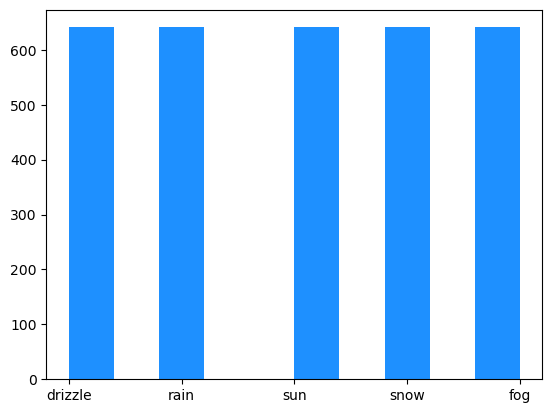

In [201]:
plt.hist(df['weather'], color='dodgerblue')
plt.show()

## Recoding class names to numbers

In [202]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [203]:
df['weather'] = le.fit_transform(df['weather'])

In [204]:
df

date  precipitation   temp_max  temp_min      wind  weather
0     2012-01-01       0.000000  12.800000  5.000000  4.700000        0
1     2012-01-02      10.900000  10.600000  2.800000  4.500000        2
2     2012-01-03       0.800000  11.700000  7.200000  2.300000        2
3     2012-01-04      20.300000  12.200000  5.600000  4.700000        2
4     2012-01-05       1.300000   8.900000  2.800000  6.100000        2
...          ...            ...        ...       ...       ...      ...
3200         NaN      -5.489200   5.573077  0.146154  5.851907        3
3201         NaN      22.596892  -0.645234  4.620518  7.292276        3
3202         NaN       1.532323   5.573077  2.383336  1.530801        3
3203         NaN       8.553846   8.682232 -4.328211  2.971170        3
3204         NaN       8.553846   5.573077  2.383336  5.851907        3

[3205 rows x 6 columns]

In [205]:
weather_unique_num = []
for i in idx_lst:
    num = df.loc[i]['weather']
    weather_unique_num.append(num)
weather_unique_num

[0, 1, 2, 3, 4]

In [206]:
# creating a dictionary containing assignments for each type of weather
# (key - weather type in numerical form, value - weather type in text form)
weather_map = {}
for n, l in zip(weather_unique_num, weather_unique_lbs):
    weather_map[n] = l
weather_map

{0: 'drizzle', 1: 'fog', 2: 'rain', 3: 'snow', 4: 'sun'}

In [207]:
df.head()

date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7        0
1  2012-01-02           10.9      10.6       2.8   4.5        2
2  2012-01-03            0.8      11.7       7.2   2.3        2
3  2012-01-04           20.3      12.2       5.6   4.7        2
4  2012-01-05            1.3       8.9       2.8   6.1        2

## Data division

In [208]:
df.drop(columns='date', inplace=True)
df.head()

precipitation  temp_max  temp_min  wind  weather
0            0.0      12.8       5.0   4.7        0
1           10.9      10.6       2.8   4.5        2
2            0.8      11.7       7.2   2.3        2
3           20.3      12.2       5.6   4.7        2
4            1.3       8.9       2.8   6.1        2

In [209]:
df.shape

(3205, 5)

In [210]:
df['precipitation'].max(), df['temp_max'].max(), df['temp_min'].max(), df['wind'].max()

(55.9, 35.6, 19.475702625319734, 9.5)

In [211]:
df['precipitation'].min(), df['temp_max'].min(), df['temp_min'].min(), df['wind'].min()

(-5.489199757263673, -1.6976572082895824, -7.1, 0.08807920005584124)

In [212]:
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']

### Feature scaling

In [213]:
from sklearn.preprocessing import StandardScaler

In [214]:
sc = StandardScaler()
X = sc.fit_transform(X)

### Split data into training and test set

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [217]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2564, 4), (641, 4), (2564,), (641,))

In [218]:
df.head()

precipitation  temp_max  temp_min  wind  weather
0            0.0      12.8       5.0   4.7        0
1           10.9      10.6       2.8   4.5        2
2            0.8      11.7       7.2   2.3        2
3           20.3      12.2       5.6   4.7        2
4            1.3       8.9       2.8   6.1        2

In [219]:
model_info = {
    'standard_network': {
        'loss': None,
        'accuracy': None,
    },
    'triangular': {
        'loss': None,
        'accuracy': None,
    },
    'trapezoidal': {
        'loss': None,
        'accuracy': None,
    },
    'gaussian': {
        'loss': None,
        'accuracy': None,
    },
}

## Creating a neural network model

In [220]:
classifier = tf.keras.Sequential()

classifier.add(tf.keras.layers.Dense(64, activation = 'relu', input_shape=(X_train.shape[1],)))
classifier.add(tf.keras.layers.Dense(32, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(16, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(5, activation = 'softmax'))

classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, restore_best_weights=True)

In [221]:
classifier.summary()

Model: "sequential_324"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1295 (Dense)          (None, 64)                320       
                                                                 
 dense_1296 (Dense)          (None, 32)                2080      
                                                                 
 dense_1297 (Dense)          (None, 16)                528       
                                                                 
 dense_1298 (Dense)          (None, 5)                 85        
                                                                 
Total params: 3,013
Trainable params: 3,013
Non-trainable params: 0
_________________________________________________________________


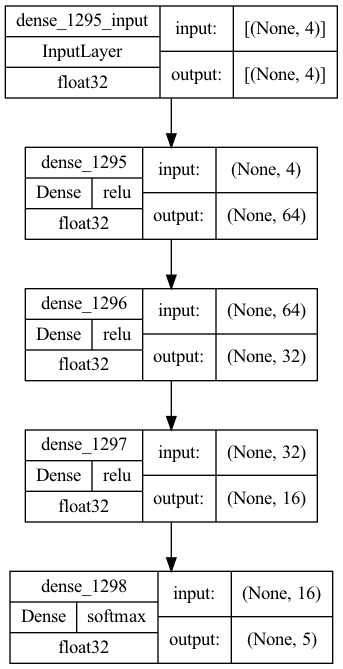

In [222]:
try:
    tf.keras.utils.plot_model(classifier, 'classifier.png', show_dtype=True, show_shapes=True, show_layer_activations=True)
    display(Image('classifier.png'))
except Exception as e:
    print(f'Error occurred: {e}')

### Model training

In [223]:
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], verbose=2)

Epoch 1/100
81/81 - 0s - loss: 1.4136 - accuracy: 0.4193 - 183ms/epoch - 2ms/step
Epoch 2/100
81/81 - 0s - loss: 1.1571 - accuracy: 0.5289 - 35ms/epoch - 428us/step
Epoch 3/100
81/81 - 0s - loss: 1.0209 - accuracy: 0.5761 - 35ms/epoch - 426us/step
Epoch 4/100
81/81 - 0s - loss: 0.9336 - accuracy: 0.6073 - 35ms/epoch - 426us/step
Epoch 5/100
81/81 - 0s - loss: 0.8725 - accuracy: 0.6283 - 35ms/epoch - 426us/step
Epoch 6/100
81/81 - 0s - loss: 0.8441 - accuracy: 0.6373 - 35ms/epoch - 428us/step
Epoch 7/100
81/81 - 0s - loss: 0.8010 - accuracy: 0.6572 - 34ms/epoch - 424us/step
Epoch 8/100
81/81 - 0s - loss: 0.7794 - accuracy: 0.6689 - 34ms/epoch - 416us/step
Epoch 9/100
81/81 - 0s - loss: 0.7586 - accuracy: 0.6759 - 34ms/epoch - 417us/step
Epoch 10/100
81/81 - 0s - loss: 0.7342 - accuracy: 0.6853 - 34ms/epoch - 425us/step
Epoch 11/100
81/81 - 0s - loss: 0.7148 - accuracy: 0.6966 - 34ms/epoch - 423us/step
Epoch 12/100
81/81 - 0s - loss: 0.6989 - accuracy: 0.7102 - 34ms/epoch - 423us/step
Ep

### Model predictions

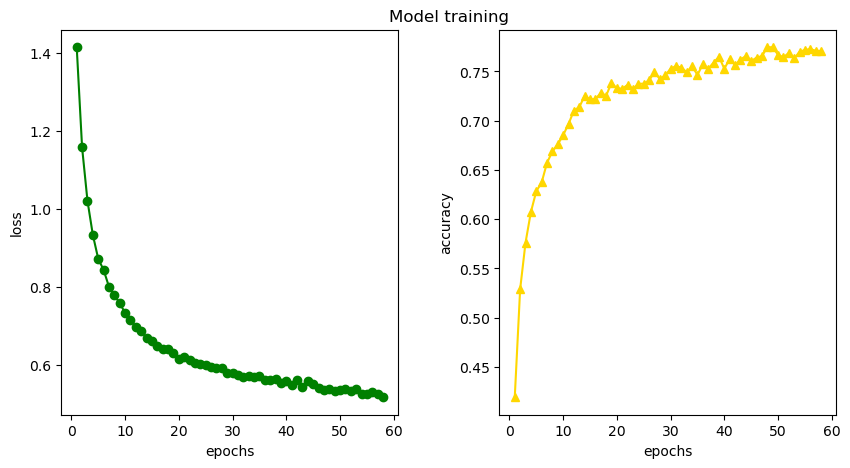

In [224]:
show_training_data()

In [225]:
loss, acc = classifier.evaluate(X_test, y_test, verbose=0)
model_info['standard_network']['loss'] = loss
model_info['standard_network']['accuracy'] = acc

y_pred = np.argmax(classifier.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.58, Model accuracy: 0.75

Classification report: 
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       136
           1       0.61      0.40      0.48       133
           2       0.88      0.91      0.90       109
           3       0.97      0.90      0.93       127
           4       0.65      0.86      0.74       136

    accuracy                           0.75       641
   macro avg       0.76      0.75      0.75       641
weighted avg       0.75      0.75      0.74       641



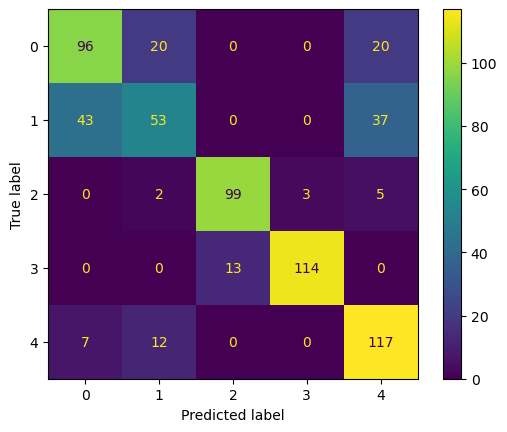

Accuracy: 0.7472698907956318


In [226]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print('Accuracy:', '\033[93m' + str(accuracy_score(y_test,y_pred)))

## Network training based on triangular membership function

In [227]:
concat = np.stack([triangular_preprocess(i) for i in X[:, range(4)]], axis=1)
concat

array([[0.        , 0.        , 0.03706616, ..., 0.35087153, 0.81408118,
        0.70555367],
       [0.        , 0.        , 0.09394306, ..., 0.        , 0.18118493,
        0.        ],
       [0.        , 0.        , 0.69999333, ..., 0.03989652, 0.        ,
        0.        ],
       [0.        , 0.93423067, 0.        , ..., 0.        , 0.405147  ,
        0.        ]])

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

### Model training

In [229]:
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], verbose=0)

### Model predictions

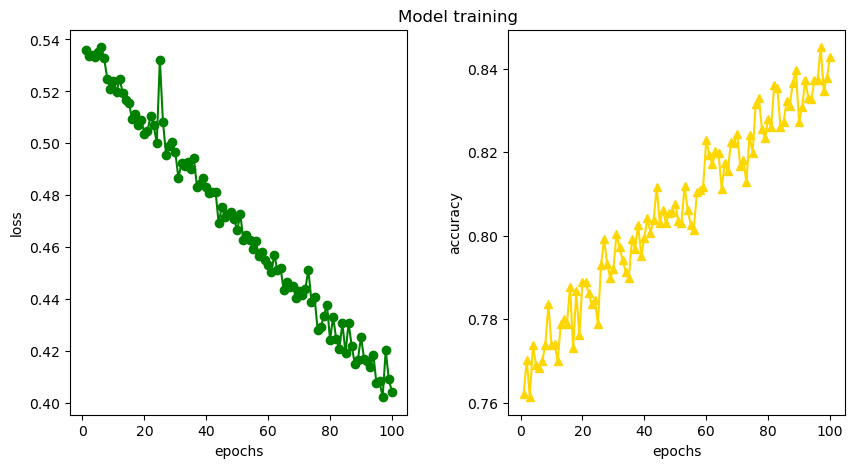

In [230]:
show_training_data()

In [231]:
loss, acc = classifier.evaluate(X_test, y_test, verbose=0)
model_info['triangular']['loss'] = loss
model_info['triangular']['accuracy'] = acc

y_pred = np.argmax(classifier.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.49, Model accuracy: 0.82

Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       136
           1       0.70      0.74      0.72       133
           2       0.93      0.89      0.91       109
           3       0.94      0.94      0.94       127
           4       0.74      0.82      0.78       136

    accuracy                           0.82       641
   macro avg       0.83      0.82      0.82       641
weighted avg       0.82      0.82      0.82       641



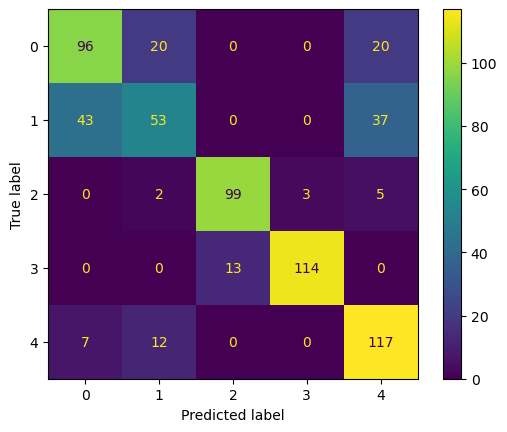

Accuracy: 0.8159126365054602


In [232]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print('Accuracy:', '\033[93m' + str(accuracy_score(y_test,y_pred)))

## Network training based on trapezoidal membership function

In [233]:
concat = np.stack([trapezoidal_preprocess(i) for i in X[:, range(4)]], axis=1)
concat

array([[0.        , 0.        , 0.31771296, ..., 0.        , 0.        ,
        0.46434261],
       [0.        , 0.        , 0.80523389, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.33869485, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

### Model training

In [235]:
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], verbose=0)

### Model predictions

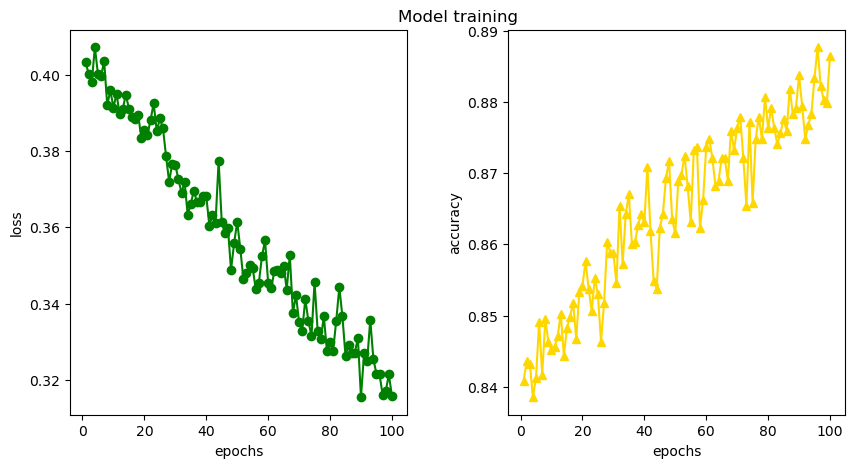

In [236]:
show_training_data()

In [237]:
loss, acc = classifier.evaluate(X_test, y_test, verbose=0)
model_info['trapezoidal']['loss'] = loss
model_info['trapezoidal']['accuracy'] = acc

y_pred = np.argmax(classifier.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.50, Model accuracy: 0.82

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       136
           1       0.76      0.73      0.75       133
           2       0.89      0.92      0.90       109
           3       0.96      0.91      0.93       127
           4       0.70      0.79      0.74       136

    accuracy                           0.82       641
   macro avg       0.83      0.83      0.83       641
weighted avg       0.83      0.82      0.82       641



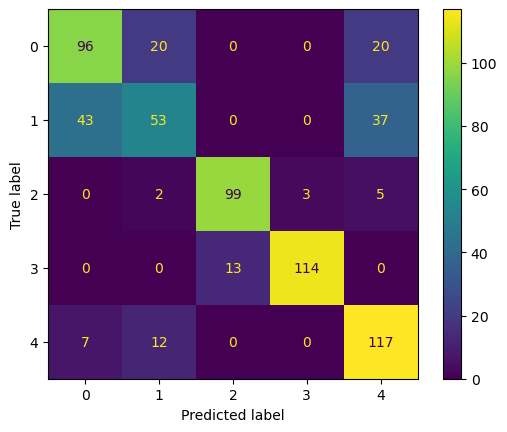

Accuracy: 0.8237129485179407


In [238]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print('Accuracy:', '\033[93m' + str(accuracy_score(y_test,y_pred)))

## Network training based on Gaussian membership function

In [239]:
concat = np.stack([gaussian_preprocess(i) for i in X[:, range(4)]], axis=1)
concat

array([[0.19422861, 0.93148359, 0.08050613, ..., 0.32528395, 0.9329165 ,
        0.92263952],
       [0.39125325, 0.27079099, 0.10746542, ..., 0.01815275, 0.26004783,
        0.16236247],
       [0.35208411, 0.19827436, 0.78305588, ..., 0.08570554, 0.03888621,
        0.27009861],
       [0.93544036, 0.99659923, 0.0160344 , ..., 0.01709426, 0.49122509,
        0.96448611]])

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

### Model training

In [241]:
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], verbose=0)

### Model predictions

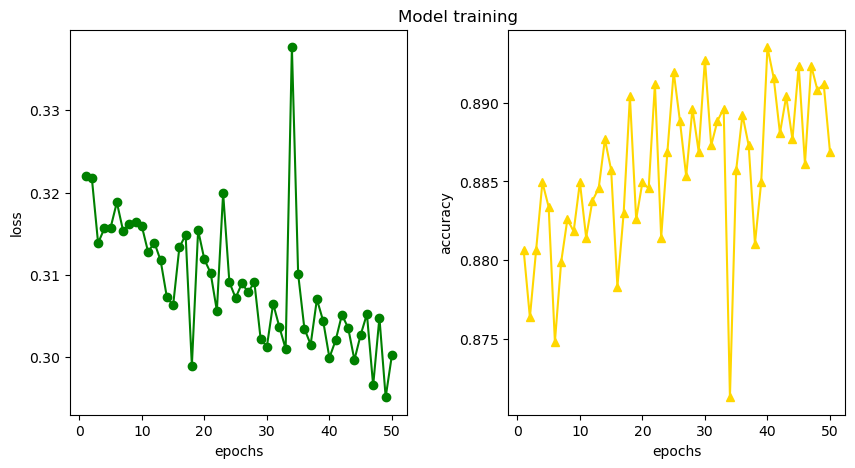

In [242]:
show_training_data()

In [243]:
loss, acc = classifier.evaluate(X_test, y_test, verbose=0)
model_info['gaussian']['loss'] = loss
model_info['gaussian']['accuracy'] = acc

y_pred = np.argmax(classifier.predict(X_test, verbose=0), axis=1)

print(f'Model loss: {loss:.2f}, Model accuracy: {acc:.2f}\n\nClassification report: \n{classification_report(y_test, y_pred)}')

Model loss: 0.48, Model accuracy: 0.84

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       136
           1       0.78      0.75      0.76       133
           2       0.89      0.93      0.91       109
           3       0.96      0.91      0.94       127
           4       0.72      0.78      0.75       136

    accuracy                           0.84       641
   macro avg       0.85      0.84      0.84       641
weighted avg       0.84      0.84      0.84       641



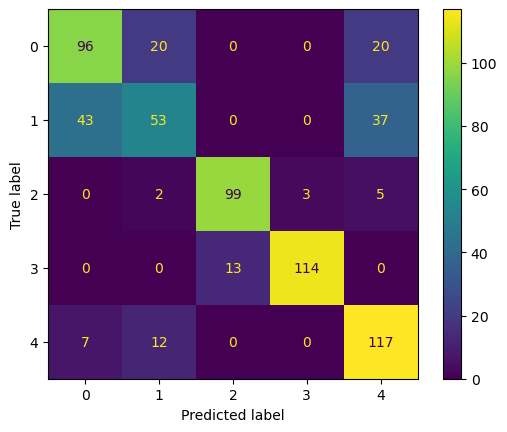

Accuracy: 0.8393135725429017


In [244]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print('Accuracy:', '\033[93m' + str(accuracy_score(y_test,y_pred)))

## Visualization of network results

In [245]:
pd.DataFrame(model_info)

standard_network  triangular  trapezoidal  gaussian
loss              0.583496    0.493784     0.495719  0.477790
accuracy          0.747270    0.815913     0.823713  0.839314